In [30]:
import ku
import requests
import time
import random
import os 
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import median
from statistics import mean
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from requests.models import Response
from string import ascii_lowercase
from urllib.request import urlopen
from bs4 import BeautifulSoup





from pprint import pprint

# Gensim
#!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

import nltk
from nltk.stem import WordNetLemmatizer 

# Plotting tools
import pyLDAvis
from pyLDAvis import gensim_models
#import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud


**last.fm API to retrieve top x songs by genre (tag)**

Application name	educational - no application
API key	e8934c6a9bbb9395fb830b15a53f2916
Shared secret	6d093f7d7b4b55ea5008303a24cd2ca5
Registered to	pajamasam29

send user to last.fm/api/auth/?api_key=xxx


 /2.0/?method=tag.gettoptracks&tag=disco&api_key=YOUR_API_KEY&format=json

In [6]:
api_key = "e8934c6a9bbb9395fb830b15a53f2916"
#end_point = 'last.fm/api/auth/'

end_point = "http://ws.audioscrobbler.com/2.0/"

def get_songs_from_lastfm(tag, number_of_songs):
    response = requests.get('http://ws.audioscrobbler.com/2.0/?method=tag.gettoptracks&tag='+tag+'&limit='+str(number_of_songs)+'&api_key=e8934c6a9bbb9395fb830b15a53f2916&format=json').json()
    collection = response['tracks']['track']
    song_list = []
    for song in collection:
        #print(song['name'])
        title = song['name']
        artist = song['artist']['name']
        song_list.append(title)
    return song_list
    #return collection
    #return {'title':title, 'artist':artist}

Include artist?

In [3]:
def get_songs_artists_from_lastfm(tag, number_of_songs):
    response = requests.get('http://ws.audioscrobbler.com/2.0/?method=tag.gettoptracks&tag='+tag+'&limit='+str(number_of_songs)+'&api_key=e8934c6a9bbb9395fb830b15a53f2916&format=json').json()
    collection = response['tracks']['track']
    song_data = []
    for song in collection:
        #print(song['name'])
        title = song['name']
        artist = song['artist']['name']
        duration = song['duration']
        song_data.append({'title':title, 'artist':artist, 'duration':duration})
    #return collection
    return song_data

# return collection if you want to view what else is available to pull



In [197]:
get_songs_from_lastfm('rap',175)

info = []
for song in get_songs_from_lastfm('rap', 175):
    info.append(song)
print(info)

info_df = pd.DataFrame(info)
print(info_df)

['Stronger', 'Heartless', 'Clint Eastwood', 'Hey Ya!', 'Ms. Jackson', 'In Da Club', 'Without Me', 'The Real Slim Shady', 'It Was A Good Day', 'Best I Ever Had', 'See You Again (feat. Kali Uchis)', 'HUMBLE.', 'Flashing Lights', 'Gold Digger', 'All of the Lights', "Can't Tell Me Nothing", 'Still D.R.E.', 'Lose Yourself', 'Power', 'Money Trees', "Gangsta's Paradise", 'I Wonder', 'Earfquake', 'Bound 2', 'Starships', 'Stressed Out', 'Stan', 'Super Bass', 'Kiss Me More (feat. SZA)', 'Pump It', 'The Next Episode', 'Mockingbird', 'Alright', 'Lollipop', 'Sunflower - Spider-Man: Into the Spider-Verse', 'Father Stretch My Hands Pt. 1', 'Love The Way You Lie', "Can't Hold Us (feat. Ray Dalton)", 'All The Stars (with SZA)', 'Slow dancing in the dark', 'DNA.', 'Runaway', 'NEW MAGIC WAND', '7 rings', 'PRIDE.', 'Woman', 'Candy Shop', 'No Role Modelz', 'Hate it or love it', 'nights', 'Beautiful Girls', 'Dark Horse', 'Replay', 'Boom Boom Pow', 'The Way I Are', 'Love Lockdown', 'LOVE. FEAT. ZACARI.', "Bo

**Retrieving data from acclaimedmusic.net txt files**


In [31]:
def read_lines_from_file(filename):
    '''Read lines from a file'''
    with open(filename, 'r', encoding='utf8') as file:  # Open in read mode
        lines = file.read().splitlines() # split lines removes the \n at the end of each line
        #lines = file.readlines()       # Read all lines into a list
    return lines

read_lines_from_file("Rock.txt")

['Bob Dylan - Like a Rolling Stone',
 'Nirvana - Smells Like Teen Spirit',
 'The Beatles - A Day In The Life - Remastered',
 'Chuck Berry - Johnny B Goode',
 "The Rolling Stones - (I Can't Get No) Satisfaction - Mono Version / Remastered 2002",
 'Elvis Presley - Heartbreak Hotel',
 'Bruce Springsteen - Born to Run',
 'The Who - My Generation - Original Mono Version',
 'Joy Division - Love Will Tear Us Apart',
 'Sex Pistols - Anarchy In The UK - Remastered 2012',
 'The Clash - London Calling',
 'The Rolling Stones - Sympathy For The Devil',
 'Little Richard - Tutti Frutti',
 'Led Zeppelin - Stairway To Heaven',
 'David Bowie - Heroes - 1999 Remaster',
 'Prince - When Doves Cry',
 'Pulp - Common People',
 'The Rolling Stones - Gimme Shelter',
 'The Kinks - You Really Got Me',
 'The White Stripes - Seven Nation Army',
 'R.E.M. - Losing My Religion',
 'Sex Pistols - God Save The Queen',
 'Queen - Bohemian Rhapsody - Remastered 2011',
 'New Order - Blue Monday',
 'Jimi Hendrix - Purple Haze

In [32]:
rock_song_list = read_lines_from_file("Rock.txt")
hiphop_song_list = read_lines_from_file("Hiphop.txt")
country_song_list = read_lines_from_file("Country.txt")
rnb_song_list = read_lines_from_file("RnB.txt")
singersongwriter_song_list = read_lines_from_file("SingerSongwriter.txt")
pop_song_list = read_lines_from_file("Pop.txt")

In [44]:
#len(rock_song_list)
#len(hiphop_song_list)
#len(country_song_list)
#len(rnb_song_list)
#len(singersongwriter_song_list)

1191

In [33]:
def song_list_to_df(song_list, genre):
    '''Inputs song list and returns a data frame with artist and song tite'''
    artists = []
    titles = []
    for song in song_list:
        info = song.split(' - ')
        artists.append(info[0])
        titles.append(info[1])
    genre = [genre] * len(artists)
    df = pd.DataFrame({'artist': artists, 'title': titles, 'genre': genre})
    return df

In [34]:
rock_df = song_list_to_df(rock_song_list[:300], "Rock")
hiphop_df = song_list_to_df(hiphop_song_list[:300], "Hiphop")
country_df = song_list_to_df(country_song_list[:300], "Country")
rnb_df = song_list_to_df(rnb_song_list[:300], "RnB")
singersongwriter_df = song_list_to_df(singersongwriter_song_list[:300], "Singer/Songwriter")
pop_df = song_list_to_df(pop_song_list[:300], "Pop")

Need a way to combat duplicates in genres

In [166]:
mask = ~rock_df['title'].isin(pop_df['title'])
mask
rock_df_filtered =  rock_df[mask]
rock_df_filtered['artist'].value_counts()

artist
Led Zeppelin         51
AC/DC                30
Metallica            30
Nirvana              27
Jimi Hendrix         25
                     ..
Joan Armatrading      1
Australian Crawl      1
Sputniks              1
Kim Gordon            1
Human Flotsam         1
Name: count, Length: 2183, dtype: int64

Look into this more..

In [7]:
rock_df['artist'].value_counts()

artist
The Beatles               16
The Rolling Stones        11
David Bowie                9
Elvis Presley              7
The Velvet Underground     5
                          ..
Roxy Music                 1
The Killers                1
Van Morrison               1
Johnny Cash                1
Pearl Jam                  1
Name: count, Length: 174, dtype: int64

## Turning song artist/titles to URLs

In [35]:
def clean_text(text):
    '''Removes special characters and blank spaces in text and returns in lowercase'''
    text = text.replace("é", "e")
    regex = re.compile('[^A-Za-z0-9_]')
    text = "".join(re.split("\(|\)|\[|\]", text)[::2])
    text = regex.sub('', text)
    text = text.lower()
    return text

In [36]:
def create_url(df = pd.DataFrame, index = int):
    '''Create song URL based on song title and artist found using the index in data frame'''
    title = df["title"][index] 
    title = clean_text(title)

    artist = df["artist"][index]
    artist = clean_text(artist)

    url = f"http://azlyrics.com/lyrics/{artist}/{title}.html"
    return url


print(create_url(pop_df, 219))
    
    

http://azlyrics.com/lyrics/clairo/bags.html


**Saving URLs to data frame**

In [10]:
hiphop_df["URL"] = pd.NA # create  new column with NA as placeholder value
pop_df["URL"] = pd.NA

hiphop_df["URL"] = hiphop_df.apply(lambda row: create_url(hiphop_df, row.name), axis=1) 
pop_df["URL"] = pop_df.apply(lambda row: create_url(pop_df, row.name), axis=1) 


In [34]:
hiphop_df.loc[8]

artist                                           Kanye West
title                                               Runaway
genre                                                Hiphop
URL       http://azlyrics.com/lyrics/kanyewest/runaway.html
lyrics                                                 <NA>
Name: 8, dtype: object

SOME ISSUES:

Beyonce = beyonceknowles
Missy Elliot = missymisdemeanorelliot

## Scraping

In [311]:
def get_lyrics(song_url):
    '''When given a URL, scrape song lyrics from AZLyrcs'''
    song = urlopen(song_url)
    soup = BeautifulSoup(song.read(), "html.parser")
    lyrics = soup.find_all("div")[22].get_text()
    return lyrics


In [312]:
test = get_lyrics('https://www.azlyrics.com/lyrics/youngthug/hercules.html')
print(test)



Thugger
The Thugger, baby, yeah
(Young Metro, Young Metro, Young Metro)
Metro! Hee
Young Metro, Young Metro, Young Metro
And what?
(Metro Boomin want some more, nigga)

Shit, shoot him in his back like Ricky but not Slick
Spent like seven bands on a tri-color pit
All my signs red like a stop, nigga, no pit
I'm on the purple, nigga, high like fuckin' Martians, whoa
In a foreign yesterday, I was just walkin', whoa
Left my baby mama, now my bitch a Barbie, whoa
All-red Dickies suit, I'm ridin' down Slauson, whoa (skrt)
Yeah, yeah, yeah, yeah
Hercu-Hercules (whoa, yeah, yeah, hey, hey)
Hercu-Hercules (heeh, heeh, yay, heeh, heeh)
Hercu-Hercules (ooh, yah, yaaaaah, yeah, yeah)
Hercu-Hercules (I got, I got, I got lean)

I smoke gas, that's that Hercules (strong marijuana)
She looked at him, oh, now she watchin' me (Bitch likes my persona)
Bitch, I'm speedin' to that guapanese (skrrt)
Old Chevy mounted up, I can't forget the T
Drop the top, shoot birds at the officers (fuck 'em)
Fuck them b

In [17]:
print(get_lyrics('https://www.azlyrics.com/lyrics/youngthug/meorus.html'))



So excited for... so what're you recording?
It's a new song, I'ma let you hear a little bit
Play it

Well this is why-a-why-a-why
Well this is why-a-why-a-why
Well this is why-a-why-a-why

Who you loyal to? Me or us?
Who you trust the most? Me or us?
Who you wanna fuck every night? Me or us?
Who you wanna take on your flight? Me or us?

Ow!
You the one that said you were doin' it
And you said you were doin' it, you're doin' it, you're doin' it
You say that what you're doin', you're doin', you're doin'
You told me that what, what you're doin', you're doin', you're doin'
What would you do?
If your brother left you, what would you do?
If them niggas came for you, you better pursue (Watch out)
I just spent ten racks on a dog from Germany, no Purdue
Oops, I meant Dupri, jewelry sitting on A/C
Yeah, yeah, yeah
I wanna know, tell me lil' baby, I wanna know
I wanna know
I got the show, fuck my show, be my show (What)
I got them loafs, I'm with Metro, he got some more (Yeah)
I don't gotta tal

**Scraping via loop**

In [25]:
#hiphop_df["lyrics"] = pd.NA # create  new column with NA as placeholder value
pop_df["lyrics"] = pd.NA
country_df["lyrics"] = pd.NA
rnb_df["lyrics"] = pd.NA
singersongwriter_df["lyrics"] = pd.NA
rock_df["lyrics"] = pd.NA

In [26]:
for url in range(0,len(pop_df)):
    time.sleep(5)
    print(url)
    try:
        pop_df.loc[url, "lyrics"] = get_lyrics(str(pop_df["URL"][url]))            
    except Exception: 
        print(f"No lyrics for {pop_df['URL'][url]}")

0
No lyrics for http://azlyrics.com/lyrics/thebeatles/adayinthelife.html
1
No lyrics for http://azlyrics.com/lyrics/thebeachboys/goodvibrations.html
2
No lyrics for http://azlyrics.com/lyrics/theronettes/bemybaby.html
3
4
5
6
No lyrics for http://azlyrics.com/lyrics/thebeachboys/godonlyknows.html
7
8
No lyrics for http://azlyrics.com/lyrics/thebeatles/strawberryfieldsforever.html
9
10
11
12
No lyrics for http://azlyrics.com/lyrics/beyonce/crazyinlove.html
13
14
15
No lyrics for http://azlyrics.com/lyrics/thejackson5/iwantyouback.html
16
No lyrics for http://azlyrics.com/lyrics/therighteousbrothers/youvelostthatlovinfeelin.html
17
No lyrics for http://azlyrics.com/lyrics/thebeatles/heyjude.html
18
No lyrics for http://azlyrics.com/lyrics/thekinks/waterloosunset.html
19
No lyrics for http://azlyrics.com/lyrics/thesmiths/thereisalightthatnevergoesout.html
20
21
22
No lyrics for http://azlyrics.com/lyrics/thebyrds/mrtambourineman.html
23
No lyrics for http://azlyrics.com/lyrics/theverve/bi

KeyboardInterrupt: 

In [27]:
#get_lyrics('http://azlyrics.com/lyrics/mia/paperplanes.html')
pop_df

artist                             title genre  \
0                       The Beatles                 A Day In The Life   Pop   
1                    The Beach Boys            Good Vibrations (Mono)   Pop   
2                      The Ronettes                        Be My Baby   Pop   
3                       Marvin Gaye  I Heard It Through The Grapevine   Pop   
4                   Michael Jackson                       Billie Jean   Pop   
..                              ...                               ...   ...   
295         Everything But The Girl                           Missing   Pop   
296  Smokey Robinson & The Miracles              The Tears Of A Clown   Pop   
297                       Tom Petty                      Free Fallin'   Pop   
298                    Sonny & Cher                    I Got You Babe   Pop   
299                  The Left Banke                   Walk Away Renee   Pop   

                                                   URL  \
0    http://azlyrics.com/lyrics/thebeatles/adayinth...   
1    http://azlyrics.com/lyrics/thebeachboys/goodvi...   
2    http://azlyrics.com/lyrics/theronettes/bemybab...   
3    http://azlyrics.com/lyrics/marvingaye/iheardit...   
4    http://azlyrics.com/lyrics/michaeljackson/bill...   
..                                                 ...   
295  http://azlyrics.com/lyrics/everythingbutthegir...   
296  http://azlyrics.com/lyrics/smokeyrobinsonthemi...   
297  http://azlyrics.com/lyrics/tompetty/freefallin...   
298  http://azlyrics.com/lyrics/sonnycher/igotyouba...   
299  http://azlyrics.com/lyrics/theleftbanke/walkaw...   

                                                lyrics  
0                                                 <NA>  
1                                                 <NA>  
2                                                 <NA>  
3    \n\r\nI bet you're wonderin' how I knew\n'Bout...  
4    \n\r\nShe was more like a beauty queen\nFrom a...  
..                                                 ...  
295                                               <NA>  
296                                               <NA>  
297                                               <NA>  
298                                               <NA>  
299                                               <NA>  

[300 rows x 5 columns]

In [28]:
#hiphop_df.to_csv("hiphopdf_withlyrics.csv")
pop_df.to_csv("popdf_withlyrics.csv")


In [151]:
hiphop_df_imported = pd.read_csv('hiphopdf_withlyrics.csv')
pop_df_imported = pd.read_csv('popdf_withlyrics.csv')
rock_df_imported = pd.read_csv('rockdf_withlyrics.csv')
rnb_df_imported = pd.read_csv('rnbdf_withlyrics.csv')
singersongwriter_df_imported = pd.read_csv('singersongwriterdf_withlyrics.csv')
country_df_imported = pd.read_csv('countrydf_withlyrics.csv')

Remove the songs that do not have lyrics.

In [152]:
pop_df_imported = pop_df_imported[pop_df_imported['lyrics'].notna()]
hiphop_df_imported = hiphop_df_imported[hiphop_df_imported['lyrics'].notna()]
rock_df_imported = rock_df_imported[rock_df_imported['lyrics'].notna()]
rnb_df_imported = rnb_df_imported[rnb_df_imported['lyrics'].notna()]
singersongwriter_df_imported = singersongwriter_df_imported[singersongwriter_df_imported['lyrics'].notna()]
country_df_imported = country_df_imported[country_df_imported['lyrics'].notna()]

Add all genres to one large data frame. Only add the first 100 songs per genre.

In [153]:
song_lyric_df = pd.concat([hiphop_df_imported[0:100], rock_df_imported[0:100], country_df_imported[0:100], pop_df_imported[0:100], rnb_df_imported[0:100], singersongwriter_df_imported[0:100]])
song_lyric_df = song_lyric_df.drop('Unnamed: 0', axis = 'columns')
song_lyric_df


artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
3              Beck                         Loser             Hiphop   
4      Public Enemy               Fight The Power             Hiphop   
5    Kendrick Lamar                       Alright             Hiphop   
6             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
108    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
109       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
110    Neil Diamond                Sweet Caroline  Singer/Songwriter   
111       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
113      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
3           http://azlyrics.com/lyrics/beck/loser.html   
4    http://azlyrics.com/lyrics/publicenemy/fightth...   
5    http://azlyrics.com/lyrics/kendricklamar/alrig...   
6      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
108  http://azlyrics.com/lyrics/gramparsons/returno...   
109  http://azlyrics.com/lyrics/philochs/iaintmarch...   
110  http://azlyrics.com/lyrics/neildiamond/sweetca...   
111  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
113  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  
0    \n\r\nI fly like paper, get high like planes\n...  
3    \n\r\nIn the time of chimpanzees\nI was a monk...  
4    \n\r\n"Yet our best trained, best educated, be...  
5    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...  
6    \n\r\nIf you're having girl problems, I feel b...  
..                                                 ...  
108  \n\r\nWon't you scratch my itch sweet Annie Ri...  
109  \n\r\nOh, I marched to the battle of New Orlea...  
110  \n\r\nWhere it began\nI can't begin to knowin'...  
111  \n\r\n'Twas in another lifetime one of toil an...  
113  \n\r\nThe first time I tasted somebody else's ...  

[600 rows x 5 columns]

In [155]:
#song_lyric_df = song_lyric_df.reset_index()
song_lyric_df = song_lyric_df.drop('index', axis = 'columns')
#ong_lyric_df = song_lyric_df.drop('level_0', axis = 'columns')
song_lyric_df



artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
1              Beck                         Loser             Hiphop   
2      Public Enemy               Fight The Power             Hiphop   
3    Kendrick Lamar                       Alright             Hiphop   
4             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
595    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
596       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
597    Neil Diamond                Sweet Caroline  Singer/Songwriter   
598       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
599      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
1           http://azlyrics.com/lyrics/beck/loser.html   
2    http://azlyrics.com/lyrics/publicenemy/fightth...   
3    http://azlyrics.com/lyrics/kendricklamar/alrig...   
4      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
595  http://azlyrics.com/lyrics/gramparsons/returno...   
596  http://azlyrics.com/lyrics/philochs/iaintmarch...   
597  http://azlyrics.com/lyrics/neildiamond/sweetca...   
598  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
599  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  
0    \n\r\nI fly like paper, get high like planes\n...  
1    \n\r\nIn the time of chimpanzees\nI was a monk...  
2    \n\r\n"Yet our best trained, best educated, be...  
3    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...  
4    \n\r\nIf you're having girl problems, I feel b...  
..                                                 ...  
595  \n\r\nWon't you scratch my itch sweet Annie Ri...  
596  \n\r\nOh, I marched to the battle of New Orlea...  
597  \n\r\nWhere it began\nI can't begin to knowin'...  
598  \n\r\n'Twas in another lifetime one of toil an...  
599  \n\r\nThe first time I tasted somebody else's ...  

[600 rows x 5 columns]

In [42]:
def text_preprocessing(uncleaned_text):
    '''Perform text preprocessing'''
    lyrics = re.sub('[^a-zA-Z]', ' ',uncleaned_text)
    lyrics = lyrics.lower()
    lyrics = lyrics.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    lyrics = [ps.stem(word) for word in lyrics if not word in set(all_stopwords)]
    lyrics = ' '.join(lyrics)
    return lyrics

**Cleaning lyrics and adding the cleaned lyrics to a new column in the overall dataframe. Also doing this for individual genres only so I can view the genre specific word frequency chart**

In [156]:
song_lyric_df['CleanedLyrics'] = song_lyric_df['lyrics'].apply(text_preprocessing)
hiphop_df_imported['CleanedLyrics'] = hiphop_df_imported['lyrics'].apply(text_preprocessing)
pop_df_imported['CleanedLyrics'] = pop_df_imported['lyrics'].apply(text_preprocessing)
country_df_imported['CleanedLyrics'] = country_df_imported['lyrics'].apply(text_preprocessing)
rock_df_imported['CleanedLyrics'] = rock_df_imported['lyrics'].apply(text_preprocessing)
rnb_df_imported['CleanedLyrics'] = rnb_df_imported['lyrics'].apply(text_preprocessing)
singersongwriter_df_imported['CleanedLyrics'] = singersongwriter_df_imported['lyrics'].apply(text_preprocessing)

In [22]:
print(song_lyric_df["CleanedLyrics"][0])

fli like paper get high like plane catch border got visa name come around make em day get one done second wait fli like paper get high like plane catch border got visa name come around make em day get one done second wait sometim think sit train everi stop get clock game everyon winner make fame bona fide hustler make name sometim think sit train everi stop get clock game everyon winner make fame bona fide hustler make name wanna take money wanna take money wanna take money wanna take money pirat skull bone stick stone weed bong run hit em lethal poison system pirat skull bone stick stone weed bomb run hit em lethal poison system one corner swagger like us hit burner prepaid wireless pack deliv like up truck alreadi go hell pump ga one corner swagger like us hit burner prepaid wireless pack deliv like up truck alreadi go hell pump ga wanna take money wanna take money wanna take money wanna take money third world democraci yeah got record k g b uh funni busi readi murder let go murder l

## Exploratory Data Analysis

In [19]:
song_lyric_df['genre'].value_counts()


genre
Hiphop               100
Rock                 100
Country              100
Pop                  100
RnB                  100
Singer/Songwriter    100
Name: count, dtype: int64

This shows there are an even amount of songs per genre

In [20]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word", color = "purple") 
  ax.set(ylabel = 'Word', xlabel = "Count") 
  plt.show()

**Top words across all genres**

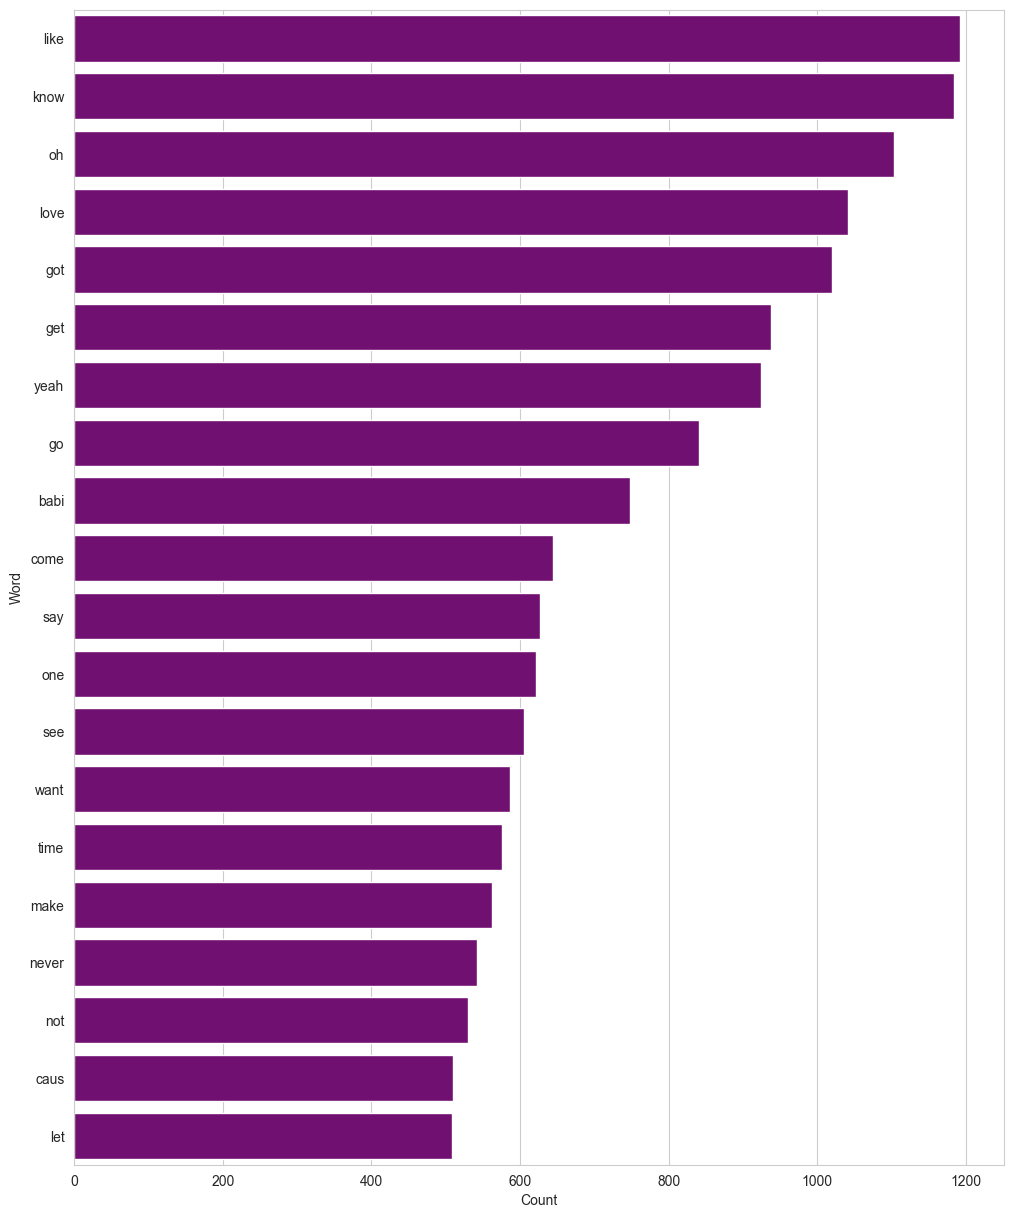

In [31]:
freq_words(song_lyric_df['CleanedLyrics'], 20)

**Top words across Hiphop**

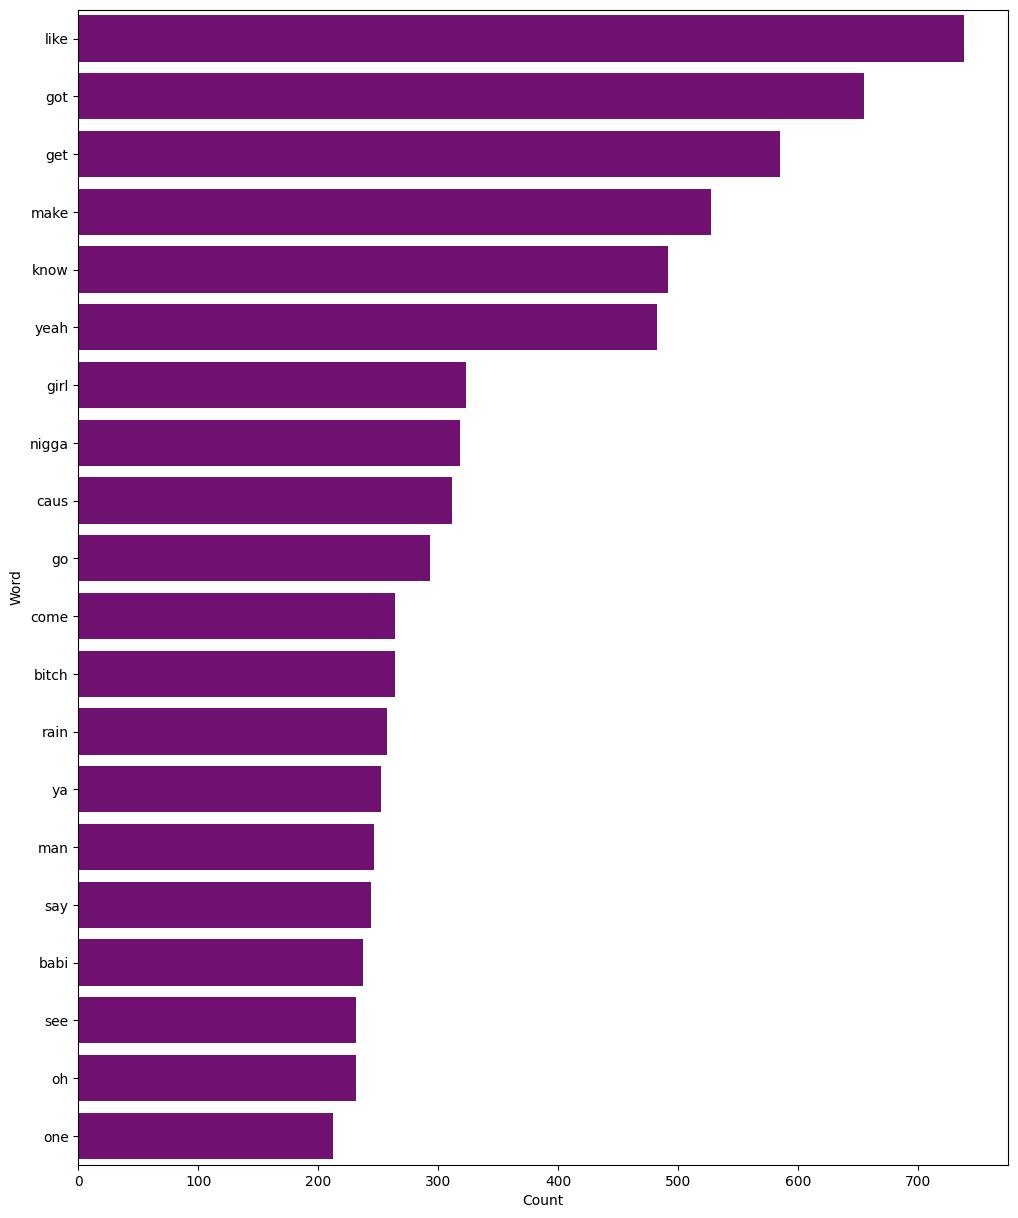

In [204]:
freq_words(hiphop_df_imported['CleanedLyrics'], 20)

**Country most spoken words**

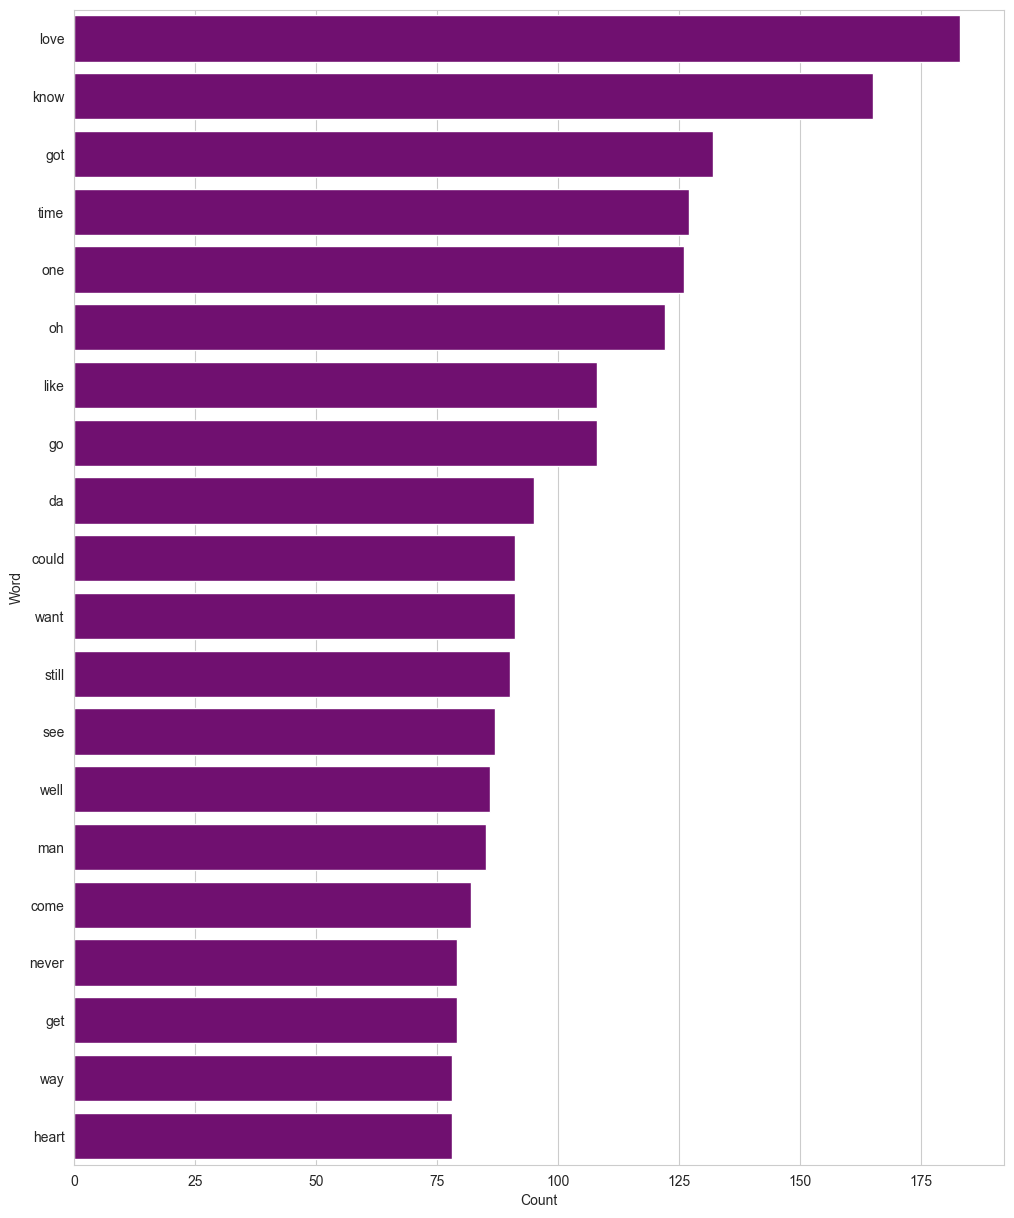

In [110]:
freq_words(country_df_imported['CleanedLyrics'], 20)

**Pop most spoken words**

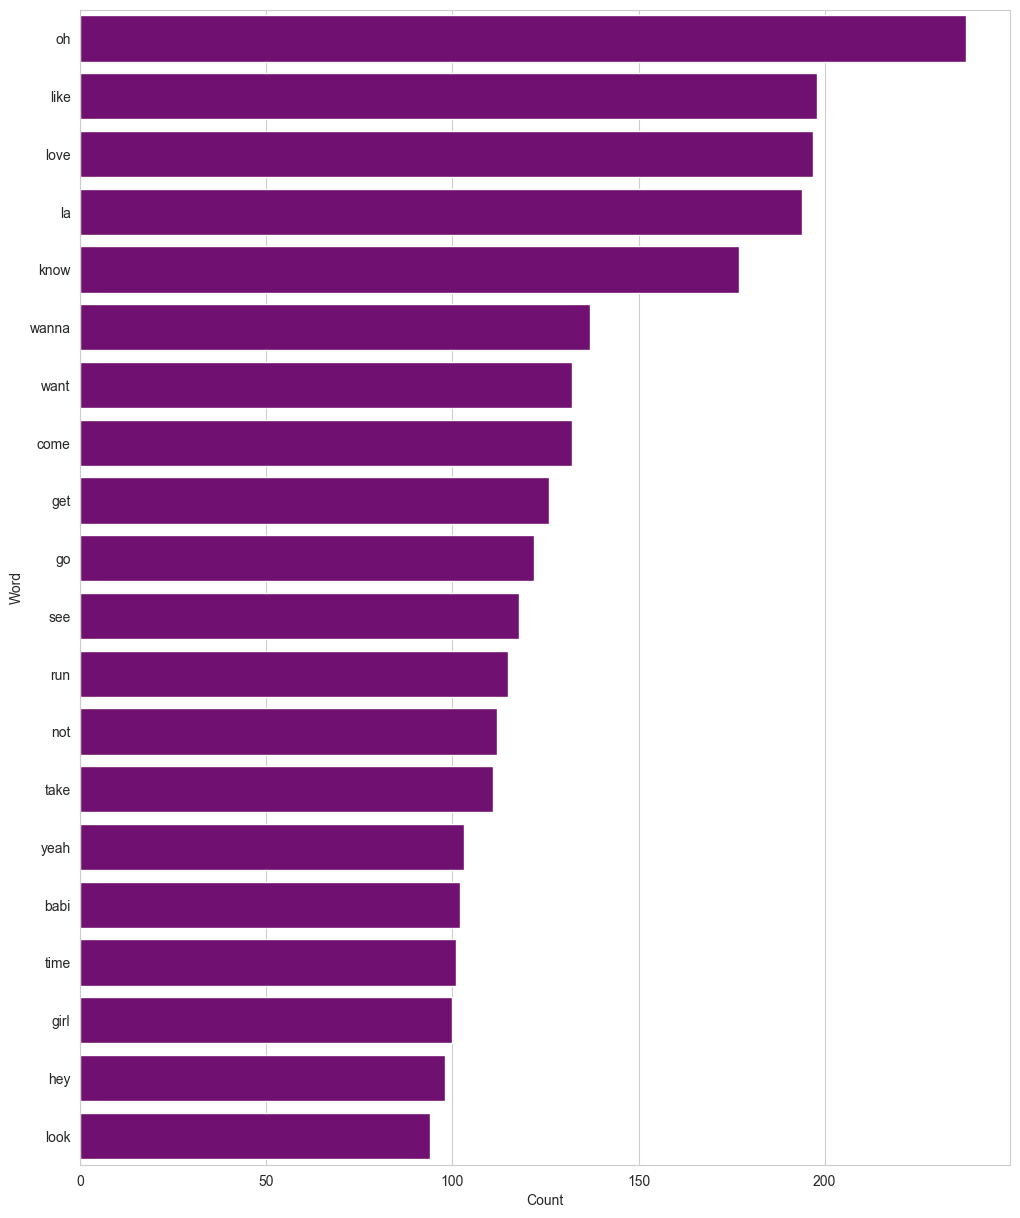

In [111]:
freq_words(pop_df_imported['CleanedLyrics'], 20)

**Rock most spoken words**

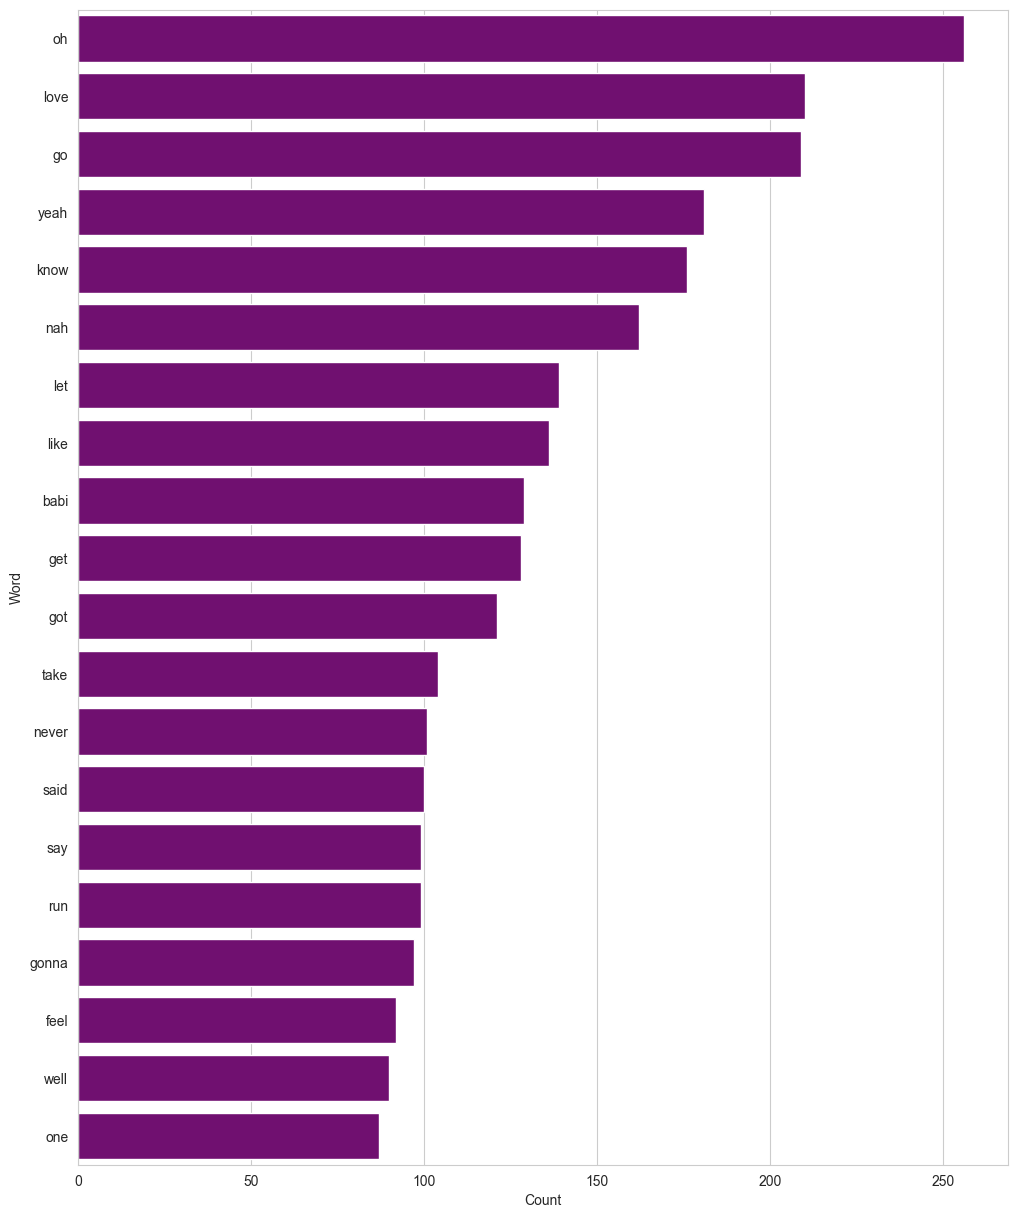

In [112]:
freq_words(rock_df_imported['CleanedLyrics'], 20)

**Singer songwriter most spoken words**

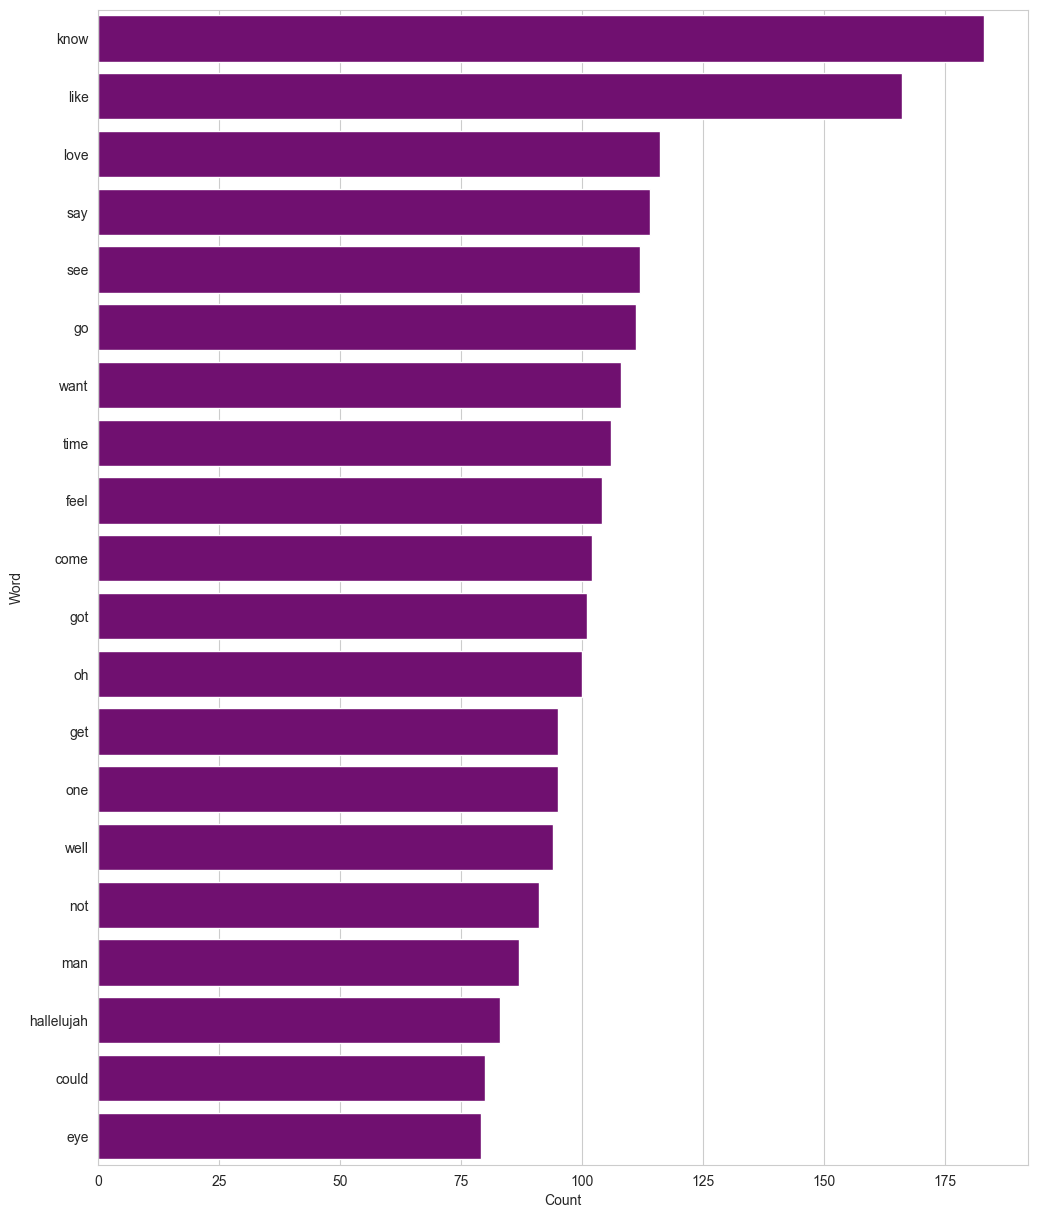

In [113]:
freq_words(singersongwriter_df_imported['CleanedLyrics'], 20)

**RnB most spoken words**

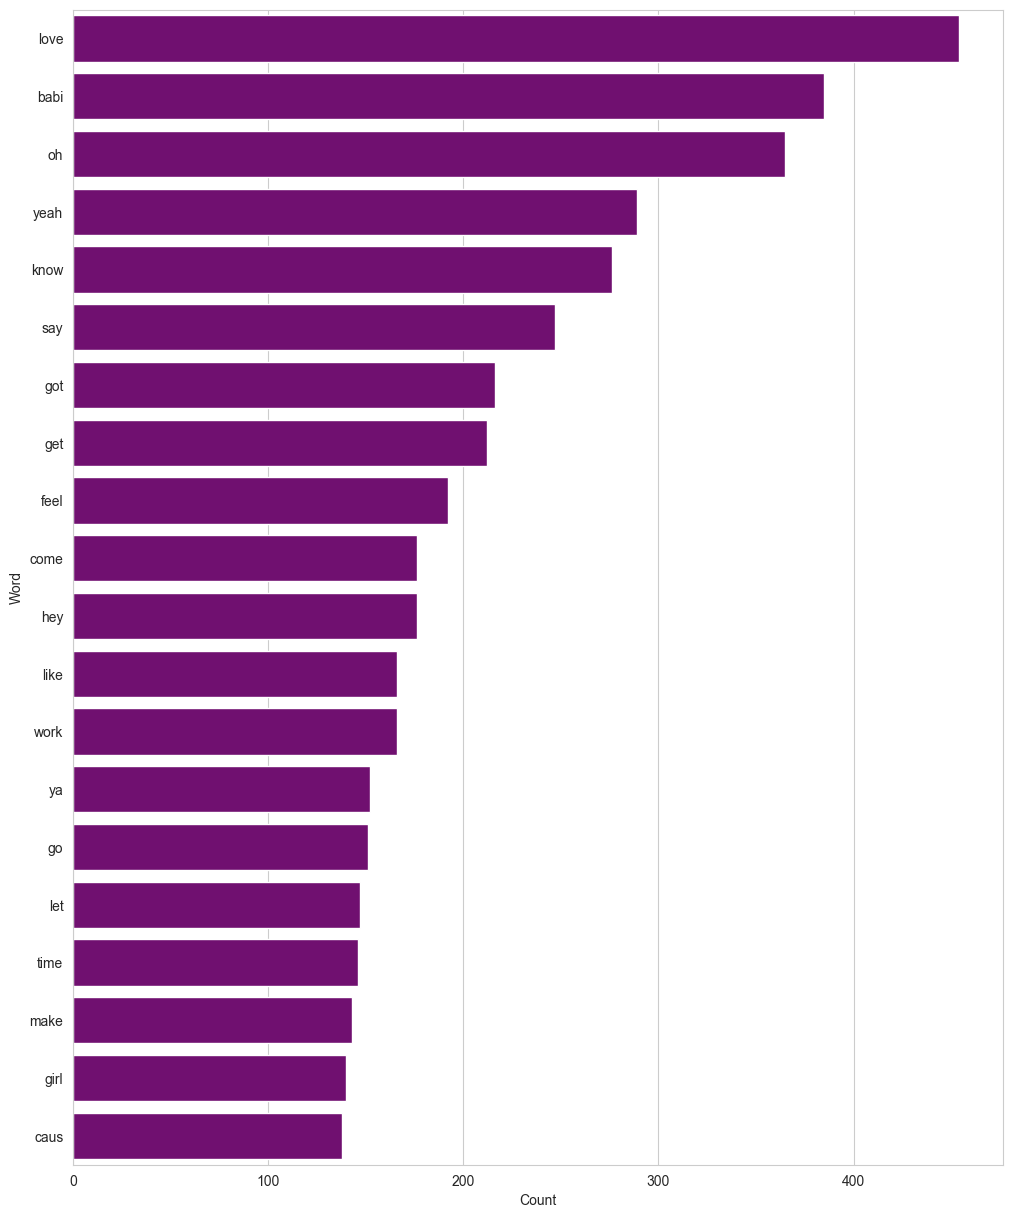

In [114]:
freq_words(rnb_df_imported['CleanedLyrics'], 20)

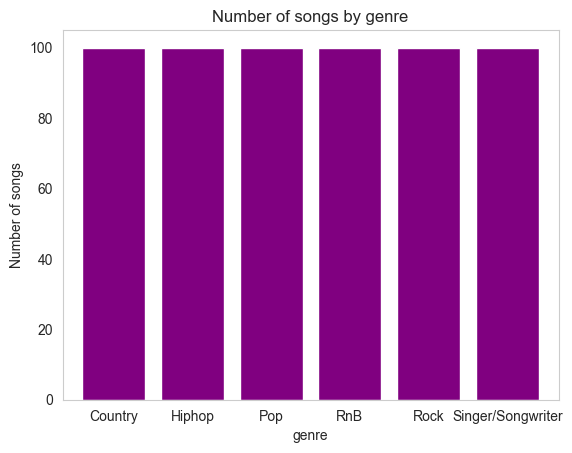

In [32]:
plot = song_lyric_df.groupby('genre').size().plot(kind='bar', width = 0.8, color ="purple", grid=False, ylabel = "Number of songs", title = "Number of songs by genre", )
plot.tick_params(rotation=0)

**Top artists by number of songs in the list**

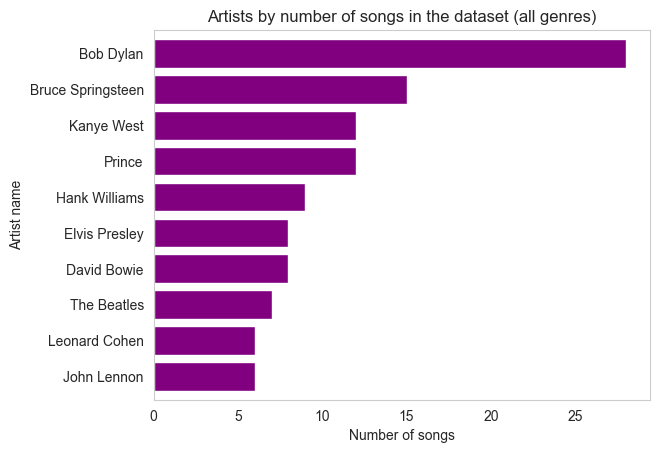

In [33]:
plot = song_lyric_df['artist'].value_counts().nlargest(n=10).sort_values(ascending=True).plot(kind='barh', width = 0.8, color ="purple", grid=False, ylabel = "Artist name", title = "Artists by number of songs in the dataset (all genres)", xlabel = "Number of songs")


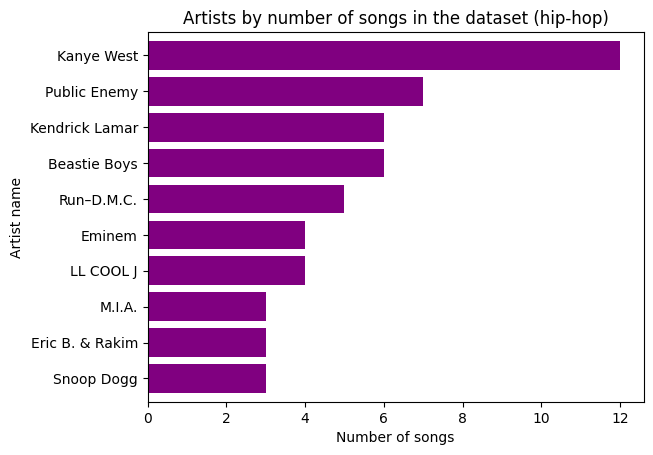

In [124]:
plot = hiphop_df_imported['artist'].value_counts().nlargest(n=10).sort_values(ascending=True).plot(kind='barh', width = 0.8, color ="purple", grid=False, ylabel = "Artist name", title = "Artists by number of songs in the dataset (hip-hop)", xlabel = "Number of songs")

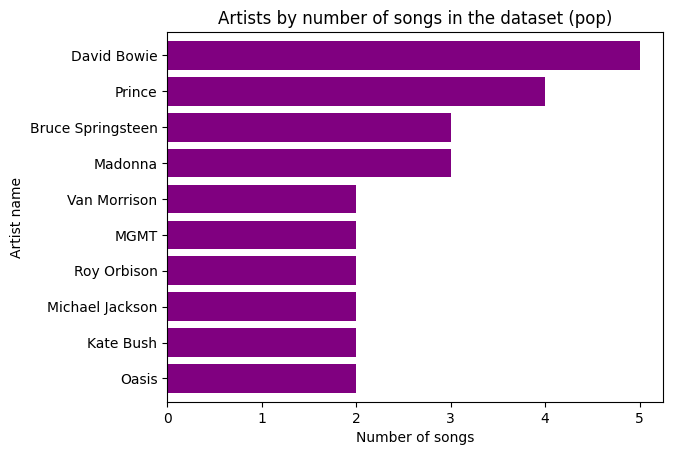

In [137]:
plot = pop_df_imported['artist'].value_counts().nlargest(n=10).sort_values(ascending=True).plot(kind='barh', width = 0.8, color ="purple", grid=False, ylabel = "Artist name", title = "Artists by number of songs in the dataset (pop)", xlabel = "Number of songs")

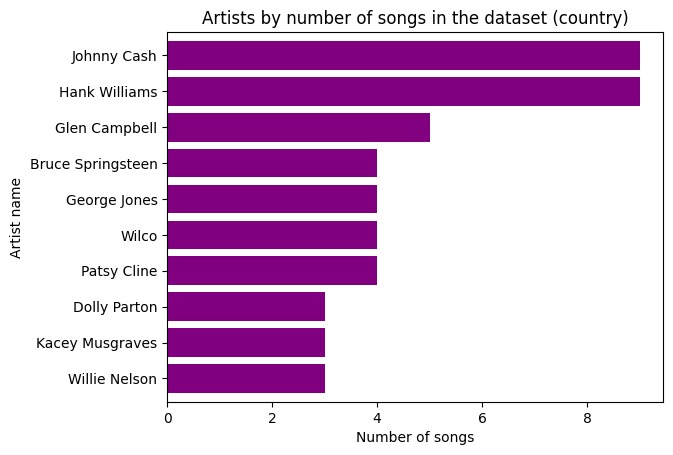

In [138]:
plot = country_df_imported['artist'].value_counts().nlargest(n=10).sort_values(ascending=True).plot(kind='barh', width = 0.8, color ="purple", grid=False, ylabel = "Artist name", title = "Artists by number of songs in the dataset (country)", xlabel = "Number of songs")

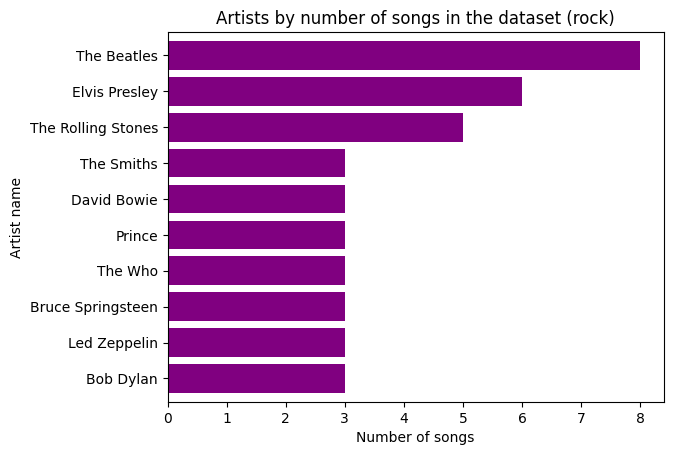

In [139]:
plot = rock_df_imported['artist'].value_counts().nlargest(n=10).sort_values(ascending=True).plot(kind='barh', width = 0.8, color ="purple", grid=False, ylabel = "Artist name", title = "Artists by number of songs in the dataset (rock)", xlabel = "Number of songs")

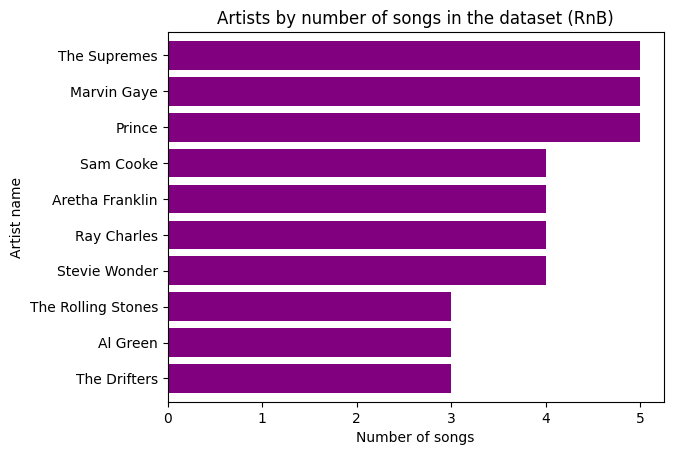

In [140]:
plot = rnb_df_imported['artist'].value_counts().nlargest(n=10).sort_values(ascending=True).plot(kind='barh', width = 0.8, color ="purple", grid=False, ylabel = "Artist name", title = "Artists by number of songs in the dataset (RnB)", xlabel = "Number of songs")

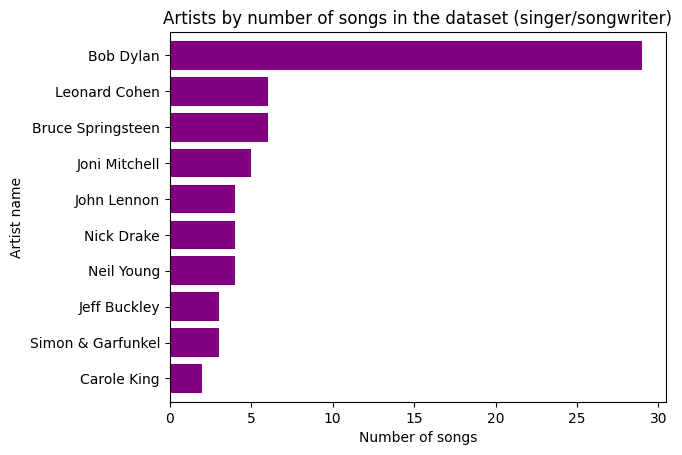

In [141]:
plot = singersongwriter_df_imported['artist'].value_counts().nlargest(n=10).sort_values(ascending=True).plot(kind='barh', width = 0.8, color ="purple", grid=False, ylabel = "Artist name", title = "Artists by number of songs in the dataset (singer/songwriter)", xlabel = "Number of songs")

We see that Bob Dylan really dominates the Singer/Songwriter genre. It will be interesting to see what results this may have.

**Find number of words in each song**

In [157]:
song_lyric_df["number_of_tokens"] = pd.NA # set placeholder value

for index in range(0,600):
    song_lyric_df.loc[index, "number_of_tokens"] = len(word_tokenize(song_lyric_df["CleanedLyrics"][index]))

**Find number of unique words in each song**

In [158]:
song_lyric_df["unique_words"] = pd.NA # set placeholder value

for index in range(0,600):
    song_lyric_df.loc[index, "unique_words"] = len(set(word_tokenize(song_lyric_df["CleanedLyrics"][index])))

In [48]:
len(set(word_tokenize(song_lyric_df["CleanedLyrics"][index])))

94

Observe below the two new columns; unique_words, number_of_tokens

In [41]:
song_lyric_df

artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
1              Beck                         Loser             Hiphop   
2      Public Enemy               Fight The Power             Hiphop   
3    Kendrick Lamar                       Alright             Hiphop   
4             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
595    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
596       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
597    Neil Diamond                Sweet Caroline  Singer/Songwriter   
598       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
599      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
1           http://azlyrics.com/lyrics/beck/loser.html   
2    http://azlyrics.com/lyrics/publicenemy/fightth...   
3    http://azlyrics.com/lyrics/kendricklamar/alrig...   
4      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
595  http://azlyrics.com/lyrics/gramparsons/returno...   
596  http://azlyrics.com/lyrics/philochs/iaintmarch...   
597  http://azlyrics.com/lyrics/neildiamond/sweetca...   
598  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
599  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  \
0    \n\r\nI fly like paper, get high like planes\n...   
1    \n\r\nIn the time of chimpanzees\nI was a monk...   
2    \n\r\n"Yet our best trained, best educated, be...   
3    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...   
4    \n\r\nIf you're having girl problems, I feel b...   
..                                                 ...   
595  \n\r\nWon't you scratch my itch sweet Annie Ri...   
596  \n\r\nOh, I marched to the battle of New Orlea...   
597  \n\r\nWhere it began\nI can't begin to knowin'...   
598  \n\r\n'Twas in another lifetime one of toil an...   
599  \n\r\nThe first time I tasted somebody else's ...   

                                         CleanedLyrics unique_words  \
0    fli like paper get high like plane catch borde...           80   
1    time chimpanze monkey butan vein cut junki pla...          132   
2    yet best train best educ best equip best prepa...          135   
3    kendrick lamar all life fight nigga all life h...          197   
4    girl problem feel bad son got problem bitch on...          199   
..                                                 ...          ...   
595  scratch itch sweet anni rich welcom back town ...           95   
596  oh march battl new orlean end earli british wa...           87   
597  began begin knowin know growin strong spring s...           36   
598  twa anoth lifetim one toil blood black virtu r...          151   
599  first time tast somebodi els spit cough fit mi...           94   

    number_of_tokens  
0                211  
1                191  
2                214  
3                368  
4                356  
..               ...  
595              153  
596              136  
597               79  
598              214  
599              158  

[600 rows x 8 columns]

The code below stores the number of words in each song by genre and saves them separately. These will be used for visualisations

In [159]:
rnbwords = song_lyric_df.loc[(song_lyric_df['genre'] == 'RnB')]['number_of_tokens']
hiphopwords = song_lyric_df.loc[(song_lyric_df['genre'] == 'Hiphop')]['number_of_tokens']
rockwords = song_lyric_df.loc[(song_lyric_df['genre'] == 'Rock')]['number_of_tokens']
countrywords = song_lyric_df.loc[(song_lyric_df['genre'] == 'Country')]['number_of_tokens']
popwords = song_lyric_df.loc[(song_lyric_df['genre'] == 'Pop')]['number_of_tokens']
singersongwriterwords = song_lyric_df.loc[(song_lyric_df['genre'] == 'Singer/Songwriter')]['number_of_tokens']


In [160]:
sum(rnbwords) + sum(hiphopwords) + sum(rockwords) + sum(countrywords) + sum(popwords) + sum(singersongwriterwords)

101300

A total of 101,300 words

Do the same for unique words

In [161]:
rnbwords_unique = song_lyric_df.loc[(song_lyric_df['genre'] == 'RnB')]['unique_words']
hiphopwords_unique = song_lyric_df.loc[(song_lyric_df['genre'] == 'Hiphop')]['unique_words']
rockwords_unique = song_lyric_df.loc[(song_lyric_df['genre'] == 'Rock')]['unique_words']
countrywords_unique = song_lyric_df.loc[(song_lyric_df['genre'] == 'Country')]['unique_words']
popwords_unique = song_lyric_df.loc[(song_lyric_df['genre'] == 'Pop')]['unique_words']
singersongwriterwords_unique = song_lyric_df.loc[(song_lyric_df['genre'] == 'Singer/Songwriter')]['unique_words']

In [52]:
sum(rnbwords_unique) + sum(hiphopwords_unique) + sum(rockwords_unique) + sum(countrywords_unique) + sum(popwords_unique) + sum(singersongwriterwords_unique)

50135

50,135 unique words

In [29]:
(50135 / 101300) * 100

49.49160908193485

In [30]:
song_lyric_df

artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
1              Beck                         Loser             Hiphop   
2      Public Enemy               Fight The Power             Hiphop   
3    Kendrick Lamar                       Alright             Hiphop   
4             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
595    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
596       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
597    Neil Diamond                Sweet Caroline  Singer/Songwriter   
598       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
599      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
1           http://azlyrics.com/lyrics/beck/loser.html   
2    http://azlyrics.com/lyrics/publicenemy/fightth...   
3    http://azlyrics.com/lyrics/kendricklamar/alrig...   
4      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
595  http://azlyrics.com/lyrics/gramparsons/returno...   
596  http://azlyrics.com/lyrics/philochs/iaintmarch...   
597  http://azlyrics.com/lyrics/neildiamond/sweetca...   
598  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
599  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  \
0    \n\r\nI fly like paper, get high like planes\n...   
1    \n\r\nIn the time of chimpanzees\nI was a monk...   
2    \n\r\n"Yet our best trained, best educated, be...   
3    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...   
4    \n\r\nIf you're having girl problems, I feel b...   
..                                                 ...   
595  \n\r\nWon't you scratch my itch sweet Annie Ri...   
596  \n\r\nOh, I marched to the battle of New Orlea...   
597  \n\r\nWhere it began\nI can't begin to knowin'...   
598  \n\r\n'Twas in another lifetime one of toil an...   
599  \n\r\nThe first time I tasted somebody else's ...   

                                         CleanedLyrics number_of_tokens  \
0    fli like paper get high like plane catch borde...              211   
1    time chimpanze monkey butan vein cut junki pla...              191   
2    yet best train best educ best equip best prepa...              214   
3    kendrick lamar all life fight nigga all life h...              368   
4    girl problem feel bad son got problem bitch on...              356   
..                                                 ...              ...   
595  scratch itch sweet anni rich welcom back town ...              153   
596  oh march battl new orlean end earli british wa...              136   
597  began begin knowin know growin strong spring s...               79   
598  twa anoth lifetim one toil blood black virtu r...              214   
599  first time tast somebodi els spit cough fit mi...              158   

    unique_words  
0             80  
1            132  
2            135  
3            197  
4            199  
..           ...  
595           95  
596           87  
597           36  
598          151  
599           94  

[600 rows x 8 columns]

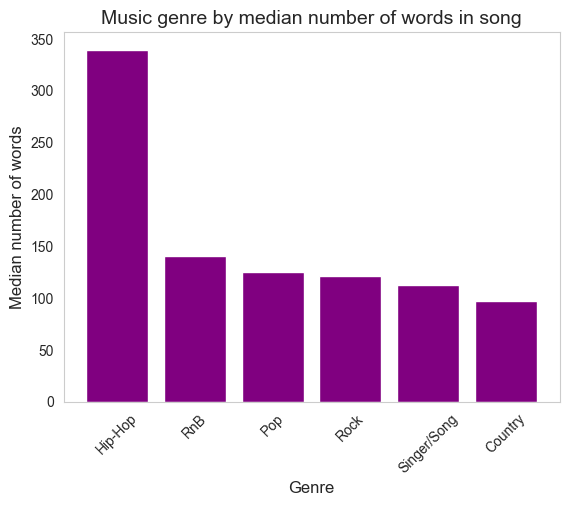

In [31]:
classes = ['RnB', 'Hip-Hop', 'Rock', 'Country', 'Pop', "Singer/Song"]
values = [median(rnbwords), median(hiphopwords), median(rockwords), median(countrywords), median(popwords), median(singersongwriterwords)]

combined_data = list(zip(values, classes))
combined_data.sort(reverse=True)  # Sort descending
values, classes = zip(*combined_data)

plt.bar(classes, values, color = 'purple')

plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation = 45)
plt.ylabel('Median number of words', fontsize=12)
plt.title('Music genre by median number of words in song', fontsize=14)
plt.grid(False)

plt.show()

In [33]:
song_lyric_df

artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
1              Beck                         Loser             Hiphop   
2      Public Enemy               Fight The Power             Hiphop   
3    Kendrick Lamar                       Alright             Hiphop   
4             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
595    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
596       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
597    Neil Diamond                Sweet Caroline  Singer/Songwriter   
598       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
599      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
1           http://azlyrics.com/lyrics/beck/loser.html   
2    http://azlyrics.com/lyrics/publicenemy/fightth...   
3    http://azlyrics.com/lyrics/kendricklamar/alrig...   
4      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
595  http://azlyrics.com/lyrics/gramparsons/returno...   
596  http://azlyrics.com/lyrics/philochs/iaintmarch...   
597  http://azlyrics.com/lyrics/neildiamond/sweetca...   
598  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
599  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  \
0    \n\r\nI fly like paper, get high like planes\n...   
1    \n\r\nIn the time of chimpanzees\nI was a monk...   
2    \n\r\n"Yet our best trained, best educated, be...   
3    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...   
4    \n\r\nIf you're having girl problems, I feel b...   
..                                                 ...   
595  \n\r\nWon't you scratch my itch sweet Annie Ri...   
596  \n\r\nOh, I marched to the battle of New Orlea...   
597  \n\r\nWhere it began\nI can't begin to knowin'...   
598  \n\r\n'Twas in another lifetime one of toil an...   
599  \n\r\nThe first time I tasted somebody else's ...   

                                         CleanedLyrics number_of_tokens  \
0    fli like paper get high like plane catch borde...              211   
1    time chimpanze monkey butan vein cut junki pla...              191   
2    yet best train best educ best equip best prepa...              214   
3    kendrick lamar all life fight nigga all life h...              368   
4    girl problem feel bad son got problem bitch on...              356   
..                                                 ...              ...   
595  scratch itch sweet anni rich welcom back town ...              153   
596  oh march battl new orlean end earli british wa...              136   
597  began begin knowin know growin strong spring s...               79   
598  twa anoth lifetim one toil blood black virtu r...              214   
599  first time tast somebodi els spit cough fit mi...              158   

    unique_words  
0             80  
1            132  
2            135  
3            197  
4            199  
..           ...  
595           95  
596           87  
597           36  
598          151  
599           94  

[600 rows x 8 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

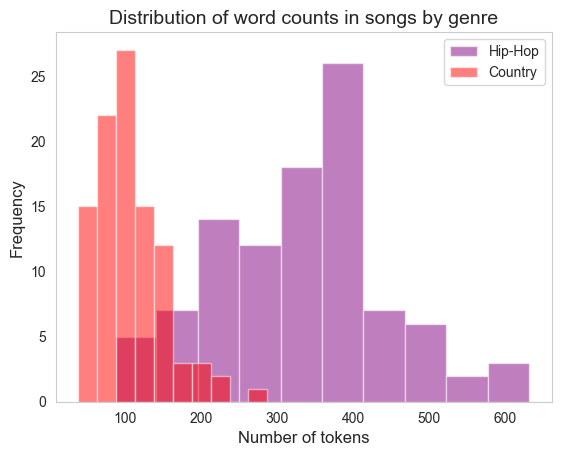

In [63]:
#plt.hist(rnbwords, alpha = 0.5)
plt.hist(hiphopwords, alpha = 0.5, color = 'purple')
#plt.hist(rockwords, alpha = 0.5)
plt.hist(countrywords, alpha = 0.5, color = 'red')

plt.grid(False)
plt.title("Distribution of word counts in songs by genre", fontsize=14)
plt.xlabel("Number of tokens", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
#plt.legend(['RnB', 'HipHop', 'Rock', 'Country'])
plt.legend(['Hip-Hop', 'Country'])

plt.show

In [64]:
median(rnbwords_unique)

54.5

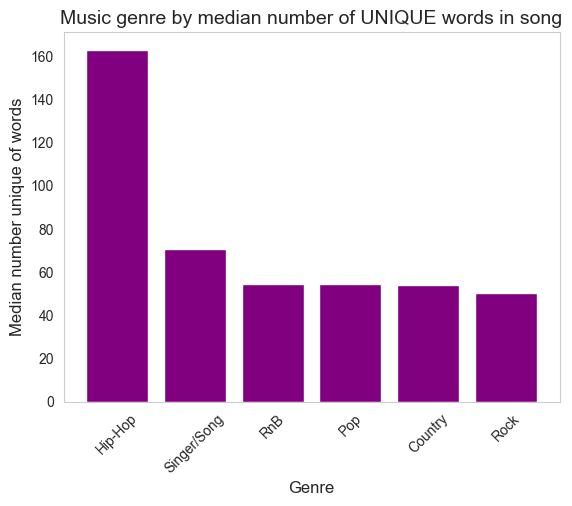

In [65]:
classes = ['RnB', 'Hip-Hop', 'Rock', 'Country', 'Pop', "Singer/Song"]
values = [median(rnbwords_unique), median(hiphopwords_unique), median(rockwords_unique), median(countrywords_unique), median(popwords_unique), median(singersongwriterwords_unique)]

combined_data = list(zip(values, classes))
combined_data.sort(reverse=True)  # Sort descending
values, classes = zip(*combined_data)

plt.bar(classes, values, color = 'purple')

plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation = 45)
plt.ylabel('Median number unique of words', fontsize=12)
plt.title('Music genre by median number of UNIQUE words in song', fontsize=14)
plt.grid(False)

plt.show()

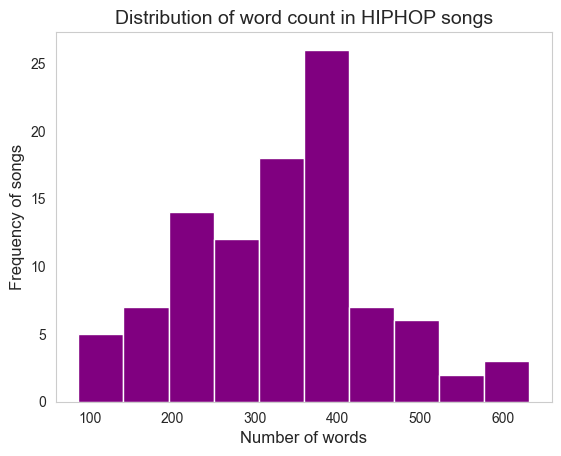

In [125]:
plt.hist(hiphopwords, color = 'purple')
plt.xlabel('Number of words', fontsize=12)
plt.ylabel('Frequency of songs', fontsize=12)
plt.title('Distribution of word count in HIPHOP songs', fontsize=14)
plt.grid(False)

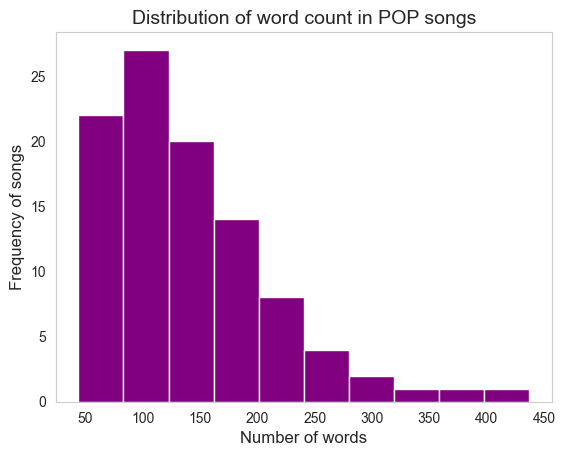

In [128]:
plt.hist(popwords, color = 'purple')
plt.xlabel('Number of words', fontsize=12)
plt.ylabel('Frequency of songs', fontsize=12)
plt.title('Distribution of word count in POP songs', fontsize=14)
plt.grid(False)

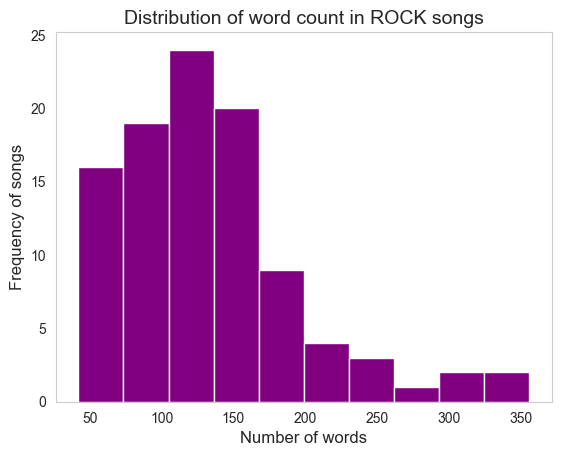

In [131]:
plt.hist(rockwords, color = 'purple')
plt.xlabel('Number of words', fontsize=12)
plt.ylabel('Frequency of songs', fontsize=12)
plt.title('Distribution of word count in ROCK songs', fontsize=14)
plt.grid(False)

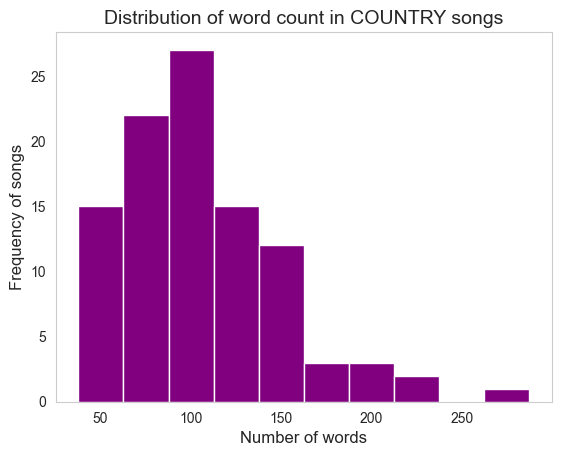

In [132]:
plt.hist(countrywords, color = 'purple')
plt.xlabel('Number of words', fontsize=12)
plt.ylabel('Frequency of songs', fontsize=12)
plt.title('Distribution of word count in COUNTRY songs', fontsize=14)
plt.grid(False)

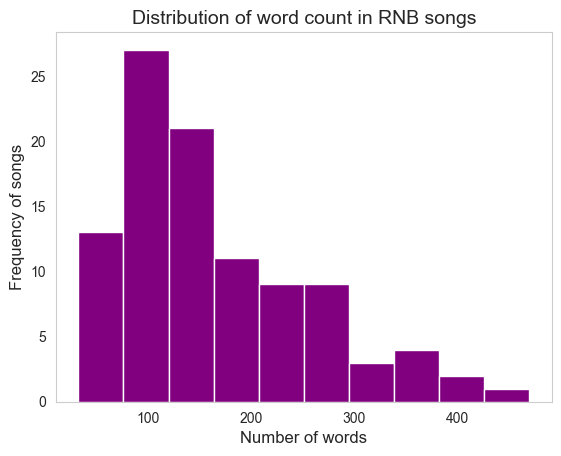

In [134]:
plt.hist(rnbwords, color = 'purple')
plt.xlabel('Number of words', fontsize=12)
plt.ylabel('Frequency of songs', fontsize=12)
plt.title('Distribution of word count in RNB songs', fontsize=14)
plt.grid(False)

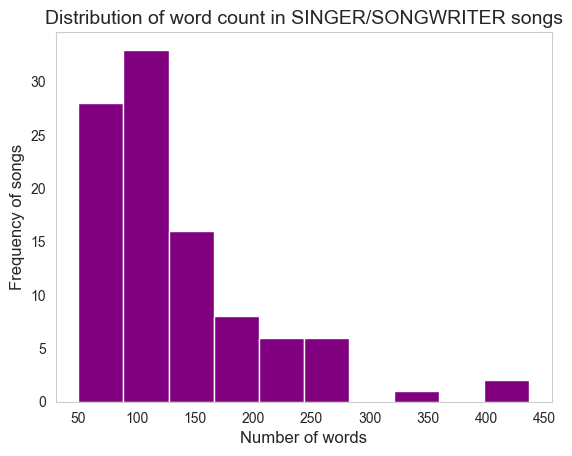

In [135]:
plt.hist(singersongwriterwords, color = 'purple')
plt.xlabel('Number of words', fontsize=12)
plt.ylabel('Frequency of songs', fontsize=12)
plt.title('Distribution of word count in SINGER/SONGWRITER songs', fontsize=14)
plt.grid(False)

In [66]:
sum(hiphopwords) / sum(hiphopwords_unique)

1.9692591271256987

In [62]:
median(hiphopwords) / median(hiphopwords_unique)

2.0828220858895707

In [84]:
mean(hiphopwords_unique) / mean(hiphopwords)


0.5078051873546907

In [83]:
median(singersongwriterwords_unique) / median(singersongwriterwords)

0.6266666666666667

In [82]:
median(rnbwords_unique) / median(rnbwords) 

0.3892857142857143

In [81]:
median(popwords_unique) / median(popwords)

0.4342629482071713

In [80]:
median(countrywords_unique) / median(countrywords) 

0.5567010309278351

In [79]:
median(rockwords_unique) / median(rockwords)

0.41735537190082644

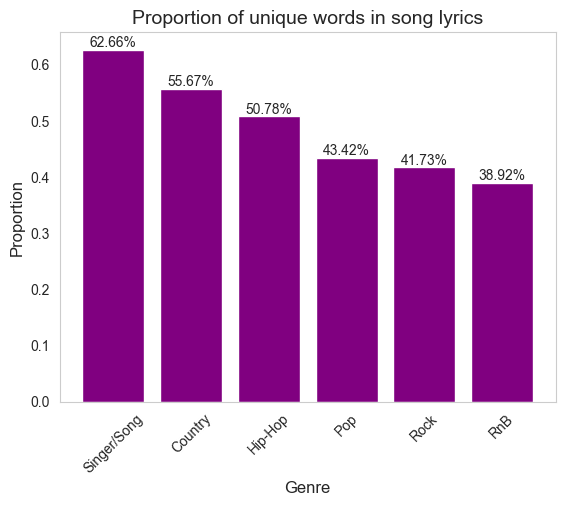

In [67]:
classes = ['RnB', 'Hip-Hop', 'Rock', 'Country', 'Pop', "Singer/Song"]
values = [median(rnbwords_unique) / median(rnbwords), mean(hiphopwords_unique) / mean(hiphopwords), median(rockwords_unique) / median(rockwords),median(countrywords_unique) / median(countrywords), median(popwords_unique) / median(popwords), median(singersongwriterwords_unique) / median(singersongwriterwords)]

combined_data = list(zip(values, classes))
combined_data.sort(reverse=True)  # Sort descending
values, classes = zip(*combined_data)

#plt.bar(classes, values, color = 'purple')

bars = plt.bar(classes, values, color = "purple")  # Store the bar objects

# Add value labels to the bars
for bar in bars:
    height = bar.get_height()
    label_text = (f'{str(height*100)[0:5]}%')  # Convert height to string
    plt.text(bar.get_x() + bar.get_width() / 2, height, label_text,
             ha='center', va='bottom') 

plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation = 45)
plt.ylabel('Proportion', fontsize=12)
plt.title('Proportion of unique words in song lyrics', fontsize=14)
plt.grid(False)

plt.show()

Singer/songwriter has the highest proportion of unique words whereas RnB has the lowest. This means RnB has a lot of word repetition.

## Machine Learning

Plan: LDA and then maybe Word2Vec?

In [33]:
song_lyric_df

artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
1              Beck                         Loser             Hiphop   
2      Public Enemy               Fight The Power             Hiphop   
3    Kendrick Lamar                       Alright             Hiphop   
4             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
595    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
596       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
597    Neil Diamond                Sweet Caroline  Singer/Songwriter   
598       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
599      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
1           http://azlyrics.com/lyrics/beck/loser.html   
2    http://azlyrics.com/lyrics/publicenemy/fightth...   
3    http://azlyrics.com/lyrics/kendricklamar/alrig...   
4      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
595  http://azlyrics.com/lyrics/gramparsons/returno...   
596  http://azlyrics.com/lyrics/philochs/iaintmarch...   
597  http://azlyrics.com/lyrics/neildiamond/sweetca...   
598  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
599  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  \
0    \n\r\nI fly like paper, get high like planes\n...   
1    \n\r\nIn the time of chimpanzees\nI was a monk...   
2    \n\r\n"Yet our best trained, best educated, be...   
3    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...   
4    \n\r\nIf you're having girl problems, I feel b...   
..                                                 ...   
595  \n\r\nWon't you scratch my itch sweet Annie Ri...   
596  \n\r\nOh, I marched to the battle of New Orlea...   
597  \n\r\nWhere it began\nI can't begin to knowin'...   
598  \n\r\n'Twas in another lifetime one of toil an...   
599  \n\r\nThe first time I tasted somebody else's ...   

                                         CleanedLyrics number_of_tokens  \
0    fli like paper get high like plane catch borde...              211   
1    time chimpanze monkey butan vein cut junki pla...              191   
2    yet best train best educ best equip best prepa...              214   
3    kendrick lamar all life fight nigga all life h...              368   
4    girl problem feel bad son got problem bitch on...              356   
..                                                 ...              ...   
595  scratch itch sweet anni rich welcom back town ...              153   
596  oh march battl new orlean end earli british wa...              136   
597  began begin knowin know growin strong spring s...               79   
598  twa anoth lifetim one toil blood black virtu r...              214   
599  first time tast somebodi els spit cough fit mi...              158   

    unique_words  
0             80  
1            132  
2            135  
3            197  
4            199  
..           ...  
595           95  
596           87  
597           36  
598          151  
599           94  

[600 rows x 8 columns]

In [37]:
song_lyric_df.loc[(song_lyric_df['genre'] == 'Hiphop')]['CleanedLyrics']

400    want babi got need know got askin littl respec...
401    hey hey hey hey happenin hey brother happenin ...
402    bet wonderin knew bout plan make blue guy knew...
403    like beauti queen movi scene said mind mean on...
404    andr one two three uh babi mess around love kn...
                             ...                        
495    yeah know like playett diggiti doubt uh play p...
496    kinki girl kind take home mother never let spi...
497    snow fli cold gray chicago mornin poor littl b...
498    doh doh doh doh doh doh doh doh doh doh doh do...
499    girl close eye let rhythm get tri fight nothin...
Name: CleanedLyrics, Length: 100, dtype: object

In [42]:
def create_wordcloud(lyrics):
    '''Creates a wordcloud from cleaned lyrics'''
    long_string = ','.join(list(lyrics))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud.to_image()





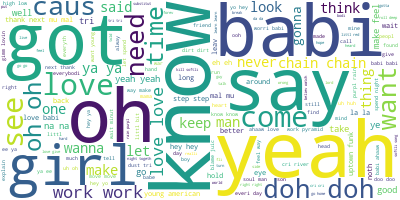

In [46]:
cleaned_hiphop_lyrics = song_lyric_df.loc[(song_lyric_df['genre'] == 'Hiphop')]['CleanedLyrics']
cleaned_rnb_lyrics = song_lyric_df.loc[(song_lyric_df['genre'] == 'RnB')]['CleanedLyrics']


create_wordcloud(cleaned_rnb_lyrics)

In [50]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))  # deacc = True removes punctuations

data_words = list(sent_to_words(song_lyric_df["CleanedLyrics"]))
#data_words


TypeError: sequence item 0: expected a bytes-like object, str found

In [57]:
bigram = gensim.models.Phrases(data_words, min_count=1, delimiter=' ') # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], min_count=1, delimiter=' ')  

In [59]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [63]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

data_words_bigrams = make_bigrams(data_words)
data_words_trigrams = make_trigrams(data_words)

In [64]:
data_words_trigrams

[['fli',
  'like',
  'paper',
  'get high',
  'like',
  'plane catch border',
  'got visa',
  'name',
  'come',
  'around',
  'make',
  'em',
  'day',
  'get',
  'one',
  'done second',
  'wait',
  'fli',
  'like',
  'paper',
  'get high',
  'like',
  'plane catch border',
  'got visa',
  'name',
  'come',
  'around',
  'make',
  'em',
  'day',
  'get',
  'one',
  'done second',
  'wait',
  'sometim',
  'think',
  'sit train everi',
  'stop',
  'get',
  'clock game everyon winner',
  'make fame',
  'bona fide',
  'hustler make name',
  'sometim',
  'think',
  'sit train everi',
  'stop',
  'get',
  'clock game everyon winner',
  'make fame',
  'bona fide',
  'hustler make name',
  'wanna',
  'take money',
  'wanna',
  'take money',
  'wanna',
  'take money',
  'wanna',
  'take money',
  'pirat skull',
  'bone stick stone weed',
  'bong',
  'run',
  'hit em lethal',
  'poison system',
  'pirat skull',
  'bone stick stone weed',
  'bomb',
  'run',
  'hit em lethal',
  'poison system',
  

In [65]:
# View bigram and trigram words
my_bigrams = []
my_trigrams = []
for sent in data_words:
    bigrams_ = [b for b in bigram_mod[sent] if b.count(' ') == 1]
    trigrams_ = [t for t in trigram_mod[bigram[sent]] if t.count(' ') == 2]
    if (len(bigrams_)>0):
      my_bigrams.append(bigrams_)
      print(bigrams_)
    if(len(trigrams_)>0):
      my_trigrams.append(trigrams_)
      print(trigrams_)

['plane catch', 'got visa', 'done second', 'plane catch', 'got visa', 'done second', 'sit train', 'clock game', 'everyon winner', 'make fame', 'bona fide', 'hustler make', 'sit train', 'clock game', 'everyon winner', 'make fame', 'bona fide', 'hustler make', 'pirat skull', 'bone stick', 'stone weed', 'em lethal', 'poison system', 'pirat skull', 'bone stick', 'stone weed', 'em lethal', 'poison system', 'corner swagger', 'hit burner', 'prepaid wireless', 'pack deliv', 'like up', 'truck alreadi', 'hell pump', 'corner swagger', 'hit burner', 'prepaid wireless', 'pack deliv', 'like up', 'truck alreadi', 'hell pump', 'busi readi']
['plane catch border', 'plane catch border', 'sit train everi', 'hustler make name', 'sit train everi', 'hustler make name', 'hit em lethal', 'hit em lethal', 'us hit burner', 'truck alreadi go', 'hell pump ga', 'us hit burner', 'truck alreadi go', 'hell pump ga']
['time chimpanze', 'monkey butan', 'vein cut', 'junki plastic', 'eyebal spray', 'paint veget', 'dog fo

In [73]:
my_bigrams
my_trigrams

[['plane catch border',
  'plane catch border',
  'sit train everi',
  'hustler make name',
  'sit train everi',
  'hustler make name',
  'hit em lethal',
  'hit em lethal',
  'us hit burner',
  'truck alreadi go',
  'hell pump ga',
  'us hit burner',
  'truck alreadi go',
  'hell pump ga'],
 ['control babi reno',
  'seat someon keep',
  'trailer park yo',
  'relat trade cash',
  'beat bodi hate',
  'time piec wax',
  'kill drive bodi',
  'feel soy un',
  'babi soy un'],
 ['bum rush show'],
 ['gon alright hear',
  'feel gon alright',
  'nigga gon alright',
  'huh gon alright',
  'alright hear feel',
  'hurt nigga pride',
  'low lookin world',
  'sure nigga preacher',
  'gun might blow',
  'gon alright hear',
  'feel gon alright',
  'nigga gon alright',
  'huh gon alright',
  'alright hear feel',
  'hurt nigga pride',
  'low lookin world',
  'sure nigga preacher',
  'gun might blow',
  'gon alright hear',
  'feel gon alright',
  'nigga gon alright',
  'huh gon alright',
  'alright hear 

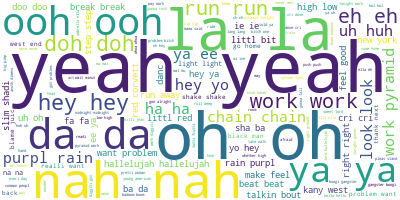

In [76]:
create_wordcloud(chain.from_iterable(my_bigrams))

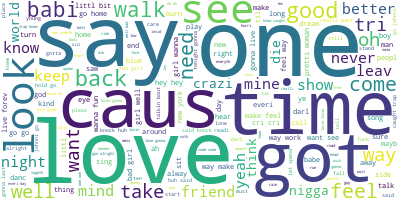

In [77]:
create_wordcloud(chain.from_iterable(my_trigrams))


In [88]:
#LDA topic model requires two things: the dictionary(id2word) and the corpus
# Create Dictionary
id2word = corpora.Dictionary(my_bigrams) #data_words_bigrams

#filtering words less frequent and high frequent; taking only the top 100,000 keywords
#id2word.filter_extremes(keep_n=100000)

# Create Corpus
texts = my_bigrams #data_words_bigrams

# Term Document Frequency (Bag of Words Approach)
corpus = [id2word.doc2bow(text) for text in texts]


In [89]:
# View
print(corpus[1:2])

[[(22, 4), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 4), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 4), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 4), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 4), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)]]


In [90]:
# readable format of corpus (term-frequency) in a sentence
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[1:2]]

[[('babi kill', 4),
  ('babi reno', 1),
  ('bag rerun', 1),
  ('ban music', 1),
  ('barrel buckshot', 1),
  ('believ soy', 1),
  ('bodi hate', 1),
  ('bozo nightmar', 1),
  ('bring soy', 1),
  ('car flame', 1),
  ('chamber caus', 1),
  ('choke splinter', 1),
  ('complain shotgun', 1),
  ('coupl couch', 1),
  ('crazi cheez', 1),
  ('cut soy', 1),
  ('daytim crap', 1),
  ('dog food', 1),
  ('drive bodi', 1),
  ('driver winner', 1),
  ('everyth breath', 1),
  ('eyebal spray', 1),
  ('fall termit', 1),
  ('flag one', 1),
  ('folksing slob', 1),
  ('forc evil', 1),
  ('got weasel', 1),
  ('hang pigeon', 1),
  ('headlight put', 1),
  ('hung guitar', 1),
  ('junki plastic', 1),
  ('kill doubl', 1),
  ('kill soy', 1),
  ('kill sprechen', 1),
  ('loser babi', 4),
  ('loser cruis', 1),
  ('mace dark', 1),
  ('maggot sleev', 1),
  ('monkey butan', 1),
  ('neutral stock', 1),
  ('nose job', 1),
  ('paint veget', 1),
  ('pantyhos kill', 1),
  ('park violat', 1),
  ('perdedor loser', 4),
  ('phoni g

In [91]:
%%time
# Building the topic model - LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=1001,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

CPU times: total: 1.47 s
Wall time: 4.1 s


In [92]:
%%time
# Print the Keywords in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.067*"ya ya" + 0.042*"ya ee" + 0.030*"ee ya" + 0.024*"blame juic" + '
  '0.018*"gotta blame" + 0.018*"insid hand" + 0.018*"big pimp" + 0.015*"stay '
  'aliv" + 0.014*"walk street" + 0.012*"juic blame"'),
 (1,
  '0.026*"come home" + 0.022*"whoa whoa" + 0.021*"gangster boogi" + '
  '0.019*"everi night" + 0.018*"gonna rock" + 0.018*"lose mind" + 0.017*"fast '
  'car" + 0.016*"mama said" + 0.015*"bad girl" + 0.014*"live life"'),
 (2,
  '0.094*"hey hey" + 0.037*"step step" + 0.030*"break break" + 0.022*"never '
  'seen" + 0.022*"left went" + 0.022*"good god" + 0.017*"huh huh" + '
  '0.016*"prophet say" + 0.013*"insid dna" + 0.009*"give damn"'),
 (3,
  '0.055*"right right" + 0.023*"long long" + 0.020*"stand alon" + 0.018*"go '
  'nowher" + 0.016*"london call" + 0.014*"jesu walk" + 0.013*"lang lang" + '
  '0.013*"galang lang" + 0.012*"play play" + 0.011*"purpl haze"'),
 (4,
  '0.042*"someon els" + 0.030*"felt like" + 0.023*"go ahead" + 0.013*"name '
  'name" + 0.013*"got sunshin" + 0

In [93]:
#Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -20.4503704552269

Coherence Score:  0.4645011485295886


In [95]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.036116 -0.256906       1        1  9.099657
6     -0.015018  0.099518       2        1  7.534090
18    -0.024121  0.027297       3        1  7.131025
13     0.291410 -0.013295       4        1  6.692430
7     -0.023214  0.009495       5        1  5.939806
12    -0.038772  0.042897       6        1  5.685142
15    -0.016618  0.014740       7        1  5.576646
16    -0.004797 -0.053260       8        1  5.319703
2     -0.015459  0.014958       9        1  5.150396
19    -0.030892  0.009242      10        1  5.009307
17    -0.011474  0.015670      11        1  4.657766
3      0.003180  0.012070      12        1  4.649299
5     -0.005675  0.014103      13        1  4.534684
9     -0.007587  0.014301      14        1  4.226405
10    -0.010297  0.006132      15        1  3.904185
0     -0.013785  0.016314      16        1  3.687502
8     -0.012465  0.011671      17        1  3.294347
4     -0.009548  0.011301      18        1  3.008376
11    -0.015223 -0.001999      19        1  2.958609
14    -0.003531  0.005751      20        1  1.940627, topic_info=               Term        Freq       Total Category  logprob  loglift
848           oh oh  326.000000  326.000000  Default  30.0000  30.0000
361       yeah yeah  326.000000  326.000000  Default  29.0000  29.0000
1770          la la  159.000000  159.000000  Default  28.0000  28.0000
1671        hey hey  109.000000  109.000000  Default  27.0000  27.0000
419         ooh ooh  115.000000  115.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
753   diamond shine    0.660507    3.754735  Topic20  -6.4776   2.2044
3861     billi jean    0.056495    1.806551  Topic20  -8.9364   0.4771
3873      not lover    0.056427    1.806422  Topic20  -8.9377   0.4760
3868        kid not    0.056329    1.806235  Topic20  -8.9394   0.4744
3892         hey ya    0.056352    1.808154  Topic20  -8.9390   0.4737

[665 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1175     12  0.741566  across sea
340       3  0.395319    act like
340      10  0.577775    act like
831      17  0.944196       ah ah
1553     11  0.907309       ah ha
...     ...       ...         ...
1303     15  0.687167      ye sir
361       2  0.995869   yeah yeah
897       1  0.891802    year ago
549       9  0.092059    year old
549      11  0.736473    year old

[665 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 19, 14, 8, 13, 16, 17, 3, 20, 18, 4, 6, 10, 11, 1, 9, 5, 12, 15])

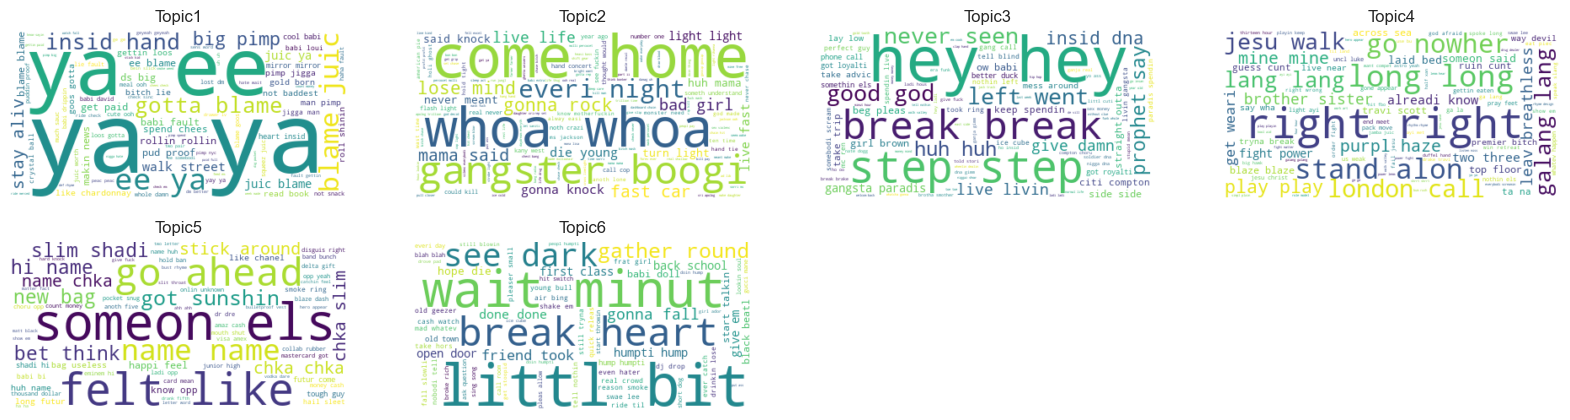

In [97]:
limit = 24
n_col = 4
counter = 0
num_topics = 6 # set to 6 because there are 6 genres
topic_words = {}
plt.figure(figsize=(20, 16))
for ind in range(num_topics):

    title_str = "Topic{}".format(ind+1)
    topic_words[title_str] = {}
    t1 = lda_model.show_topic(ind,topn=200)
    i = 0
    word_freq = dict()
    for t,v in t1:
        if(v>0.0):
            word_freq[t] = v
            topic_words[title_str][i]=t
            i = i + 1

    wordcloud = WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)
    # plt.close()

    counter += 1

## Mallet

In [104]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [99]:
#LDA topic model requires two things: the dictionary(id2word) and the corpus
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

#filtering words less frequent and high frequent; taking only the top 100,000 keywords
id2word.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency (Bag of Words Approach)
corpus = [id2word.doc2bow(text) for text in texts]

In [101]:
import os
from gensim.models.wrappers import LdaMallet
os.environ['MALLET_HOME'] = 'mallet-2.0.8'
mallet_path = 'mallet-2.0.8/bin/mallet'
#os.environ['MALLET_HOME'] = '/content/drive/MyDrive/MA5851-SP84/Week 4/Session 2/mallet-2.0.8'
#mallet_path = '/content/drive/MyDrive/MA5851-SP84/Week 4/Session 2/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

ModuleNotFoundError: No module named 'gensim.models.wrappers'

## Word2Vec

In [74]:
cleaned_corpus = list(song_lyric_df['CleanedLyrics'])

600

In [114]:
#%load_ext autoreload
#%autoreload 2 # reimport modules when evaluating cells

import warnings
warnings.filterwarnings('ignore') # ignore all warnings

import numpy as np
np.random.seed(0) # make random number generation consistent

In [7]:
from gensim.models import KeyedVectors

path = r'C:\Users\jclar\PycharmProjects\ma3831-old/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(path, binary=True)


In [79]:
vec = model['music']

words, sims = zip(*model.similar_by_vector(vec, topn=10))
print(words)
print(sims)

TypeError: 'Word2Vec' object is not subscriptable

In [28]:
#Exploring the Model
# investigate all attributes on the model
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key'

In [53]:
song_lyric_df

artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
1              Beck                         Loser             Hiphop   
2      Public Enemy               Fight The Power             Hiphop   
3    Kendrick Lamar                       Alright             Hiphop   
4             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
595    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
596       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
597    Neil Diamond                Sweet Caroline  Singer/Songwriter   
598       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
599      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
1           http://azlyrics.com/lyrics/beck/loser.html   
2    http://azlyrics.com/lyrics/publicenemy/fightth...   
3    http://azlyrics.com/lyrics/kendricklamar/alrig...   
4      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
595  http://azlyrics.com/lyrics/gramparsons/returno...   
596  http://azlyrics.com/lyrics/philochs/iaintmarch...   
597  http://azlyrics.com/lyrics/neildiamond/sweetca...   
598  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
599  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  \
0    \n\r\nI fly like paper, get high like planes\n...   
1    \n\r\nIn the time of chimpanzees\nI was a monk...   
2    \n\r\n"Yet our best trained, best educated, be...   
3    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...   
4    \n\r\nIf you're having girl problems, I feel b...   
..                                                 ...   
595  \n\r\nWon't you scratch my itch sweet Annie Ri...   
596  \n\r\nOh, I marched to the battle of New Orlea...   
597  \n\r\nWhere it began\nI can't begin to knowin'...   
598  \n\r\n'Twas in another lifetime one of toil an...   
599  \n\r\nThe first time I tasted somebody else's ...   

                                         CleanedLyrics unique_words  \
0    fli like paper get high like plane catch borde...           80   
1    time chimpanze monkey butan vein cut junki pla...          132   
2    yet best train best educ best equip best prepa...          135   
3    kendrick lamar all life fight nigga all life h...          197   
4    girl problem feel bad son got problem bitch on...          199   
..                                                 ...          ...   
595  scratch itch sweet anni rich welcom back town ...           95   
596  oh march battl new orlean end earli british wa...           87   
597  began begin knowin know growin strong spring s...           36   
598  twa anoth lifetim one toil blood black virtu r...          151   
599  first time tast somebodi els spit cough fit mi...           94   

    number_of_tokens  
0                211  
1                191  
2                214  
3                368  
4                356  
..               ...  
595              153  
596              136  
597               79  
598              214  
599              158  

[600 rows x 8 columns]

In [184]:
# Clean data using the built in cleaner in gensim
song_lyric_df['text_clean'] = song_lyric_df['lyrics'].apply(lambda x: gensim.utils.simple_preprocess(x))
song_lyric_df.head()

artist            title   genre  \
0          M.I.A.     Paper Planes  Hiphop   
1            Beck            Loser  Hiphop   
2    Public Enemy  Fight The Power  Hiphop   
3  Kendrick Lamar          Alright  Hiphop   
4           JAY-Z      99 Problems  Hiphop   

                                                 URL  \
0    http://azlyrics.com/lyrics/mia/paperplanes.html   
1         http://azlyrics.com/lyrics/beck/loser.html   
2  http://azlyrics.com/lyrics/publicenemy/fightth...   
3  http://azlyrics.com/lyrics/kendricklamar/alrig...   
4    http://azlyrics.com/lyrics/jayz/99problems.html   

                                              lyrics  \
0  \n\r\nI fly like paper, get high like planes\n...   
1  \n\r\nIn the time of chimpanzees\nI was a monk...   
2  \n\r\n"Yet our best trained, best educated, be...   
3  \n\n[Kendrick Lamar:]\nAlls my life, I has to ...   
4  \n\r\nIf you're having girl problems, I feel b...   

                                       CleanedLyrics number_of_tokens  \
0  fli like paper get high like plane catch borde...              211   
1  time chimpanze monkey butan vein cut junki pla...              191   
2  yet best train best educ best equip best prepa...              214   
3  kendrick lamar all life fight nigga all life h...              368   
4  girl problem feel bad son got problem bitch on...              356   

  unique_words                                         text_clean  
0           80  [fly, like, paper, get, high, like, planes, if...  
1          132  [in, the, time, of, chimpanzees, was, monkey, ...  
2          135  [yet, our, best, trained, best, educated, best...  
3          197  [kendrick, lamar, alls, my, life, has, to, fig...  
4          199  [if, you, re, having, girl, problems, feel, ba...

In [185]:
from sklearn.model_selection import train_test_split

# Encoding the label column
#song_lyric_df['genre']=song_lyric_df['genre'].map({'Country':0,'Hiphop':1, 'Pop':2, 'RnB':3, 'Rock':4, 'Singer/Songwriter':5})
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(song_lyric_df['text_clean'], song_lyric_df['genre'] , test_size=0.2)

In [182]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=1)

In [183]:
w2v_model.wv.index_to_key


[' ',
 'e',
 'a',
 'o',
 'i',
 't',
 'n',
 'l',
 'r',
 'h',
 's',
 'd',
 'g',
 'c',
 'm',
 'u',
 'k',
 'w',
 'b',
 'p',
 'y',
 'f',
 'v',
 'j',
 'x',
 'z',
 'q']

In [167]:
w2v_model.wv.most_similar('love')

[('give', 0.9866291880607605),
 ('need', 0.9840343594551086),
 ('why', 0.9738367199897766),
 ('you', 0.9730774760246277),
 ('know', 0.9718167781829834),
 ('exactly', 0.9690806269645691),
 ('hug', 0.966698944568634),
 ('what', 0.964316725730896),
 ('say', 0.9637561440467834),
 ('want', 0.9635972380638123)]

In [123]:
import numpy as np

In [168]:
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words], dtype='object')
                         for ls in X_train], dtype='object')
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words], dtype='object')
                         for ls in X_test], dtype='object')

In [169]:
# Why is the length of the sentence different than the length of the sentence vector?
for i, v in enumerate(X_train_vect):
    print(len(X_train.iloc[i]), len(v))

242 242
499 499
149 149
238 238
705 705
455 455
233 233
264 264
287 287
243 243
309 309
187 187
244 244
275 275
102 102
153 153
287 287
207 207
722 722
189 189
280 280
154 154
171 171
157 157
212 212
174 174
83 83
409 409
504 504
139 139
270 270
716 716
681 681
161 161
703 703
282 282
211 211
260 260
183 183
209 209
303 303
530 530
405 405
215 215
410 410
528 528
511 511
735 735
291 291
237 237
251 251
181 181
417 417
154 154
315 315
286 286
212 212
163 163
202 202
181 181
391 391
199 199
675 675
176 176
101 101
515 515
119 119
150 150
434 434
318 318
183 183
660 660
173 173
217 217
129 129
637 637
701 701
701 701
204 204
136 136
143 143
644 644
624 624
191 191
169 169
532 532
553 553
208 208
201 201
247 247
150 150
293 293
182 182
321 321
730 730
589 589
390 390
164 164
479 479
134 134
300 300
321 321
425 425
547 547
604 604
162 162
199 199
277 277
189 189
124 124
144 144
148 148
206 206
659 659
214 214
329 329
704 704
640 640
204 204
150 150
827 827
566 566
215 215
205 205
190 190
52

In [170]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [171]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(X_train_vect_avg):
    print(len(X_train.iloc[i]), len(v))

242 100
499 100
149 100
238 100
705 100
455 100
233 100
264 100
287 100
243 100
309 100
187 100
244 100
275 100
102 100
153 100
287 100
207 100
722 100
189 100
280 100
154 100
171 100
157 100
212 100
174 100
83 100
409 100
504 100
139 100
270 100
716 100
681 100
161 100
703 100
282 100
211 100
260 100
183 100
209 100
303 100
530 100
405 100
215 100
410 100
528 100
511 100
735 100
291 100
237 100
251 100
181 100
417 100
154 100
315 100
286 100
212 100
163 100
202 100
181 100
391 100
199 100
675 100
176 100
101 100
515 100
119 100
150 100
434 100
318 100
183 100
660 100
173 100
217 100
129 100
637 100
701 100
701 100
204 100
136 100
143 100
644 100
624 100
191 100
169 100
532 100
553 100
208 100
201 100
247 100
150 100
293 100
182 100
321 100
730 100
589 100
390 100
164 100
479 100
134 100
300 100
321 100
425 100
547 100
604 100
162 100
199 100
277 100
189 100
124 100
144 100
148 100
206 100
659 100
214 100
329 100
704 100
640 100
204 100
150 100
827 100
566 100
215 100
205 100
190 100
5

In [172]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [174]:
X_train_vect_avg

[array([-0.21886791880069348, 0.6103984342016325, 0.1696422282132043,
        -0.1389425464632559, 0.24290632200331141, -0.9391664019631883,
        0.3565144845696305, 0.7735456449733971, -0.28371654060396967,
        -0.3755295531131993, -0.4064803207653944, -0.8935295566839497,
        -0.2278369212095445, 0.12914353815860583, 0.2959264307273545,
        -0.38084404424083285, 0.28033011815406544, -0.6235186023621296,
        -0.1539011275413069, -0.9421696130134365, 0.3877635395191879,
        0.24765980699626836, 0.2665959905047924, -0.2755690533706287,
        0.020812417159632328, -0.08288106316082904, -0.32271912188075813,
        -0.3706769541671191, -0.2881789082562174, 0.42309268661014626,
        0.521753470728959, -0.2524472867400378, 0.07367006769946927,
        -0.761382994036121, -0.09459625690906551, 0.6617053583195079,
        -0.008978589515351836, -0.22859086707419107, -0.14629268420721628,
        -0.6792757617817684, -0.035134943982288974, -0.5946164441849143,
    

In [175]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect_avg)

In [180]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, average = "macro")
recall = recall_score(y_test, y_pred, average = 'macro')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.215 / Recall: 0.217 / Accuracy: 0.217


## XGBoost

TFIDF

In [242]:
labels = song_lyric_df['genre'].unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
#idx2class.type()

In [413]:
pd.set_option('future.no_silent_downcasting', True)
song_lyric_df['genre_label'] = song_lyric_df['genre'].replace(class2idx)

In [414]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', max_df=1.0, min_df = 1, max_features=100000,stop_words='english')
X = tfidf_vectorizer.fit_transform(cleaned_corpus).toarray()
y = song_lyric_df.iloc[:, -1].values

In [415]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)

['aaaaaaow' 'aaah' 'aah' ... 'zoo' 'zoom' 'zooti']


In [416]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 110)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state= 8) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (384, 7152)
X_test shape: (120, 7152)
y_train shape: (384,)
y_test shape: (120,)
X_val shape: (384,)
y val shape: (120,)


In [363]:
from sklearn.metrics import accuracy_score, f1_score


#allow logloss and classification error plots for each iteration of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val   = xgb.DMatrix(training_data['X_val'],   label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=5)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Weighted): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='weighted')))
    plot_compare(metrics,store,epochs)

In [237]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [231]:
len(song_lyric_df['genre'])

600

In [364]:
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softprob',
                    nthread=4,
                    num_class = 6,
                    seed=2789)

Fitting model...
Fitting done!
[0]	val-mlogloss:1.76100	val-merror:0.71875	train-mlogloss:1.71253	train-merror:0.40885
[5]	val-mlogloss:1.65968	val-merror:0.65625	train-mlogloss:1.40771	train-merror:0.21094
[10]	val-mlogloss:1.61567	val-merror:0.65625	train-mlogloss:1.19129	train-merror:0.16406
[15]	val-mlogloss:1.60101	val-merror:0.65625	train-mlogloss:1.02424	train-merror:0.13281
[20]	val-mlogloss:1.59147	val-merror:0.65625	train-mlogloss:0.89503	train-merror:0.12760
[25]	val-mlogloss:1.58563	val-merror:0.65625	train-mlogloss:0.79025	train-merror:0.11719
[30]	val-mlogloss:1.58987	val-merror:0.64583	train-mlogloss:0.71129	train-merror:0.11198
[35]	val-mlogloss:1.59926	val-merror:0.64583	train-mlogloss:0.64412	train-merror:0.10677
[40]	val-mlogloss:1.61655	val-merror:0.63542	train-mlogloss:0.58725	train-merror:0.10156
[45]	val-mlogloss:1.63290	val-merror:0.63542	train-mlogloss:0.53838	train-merror:0.10156
[49]	val-mlogloss:1.64635	val-merror:0.65625	train-mlogloss:0.50406	train-merror:

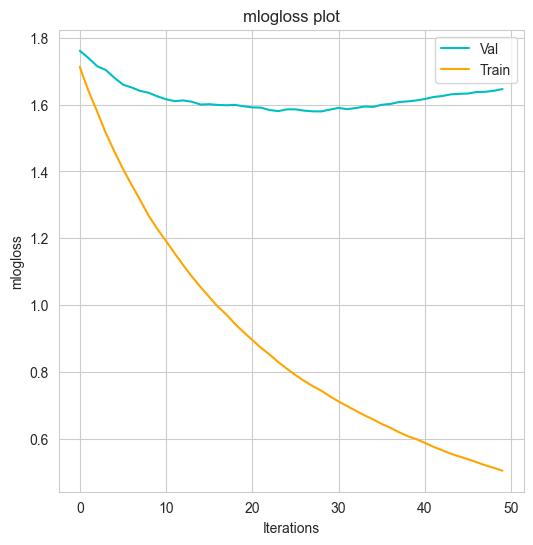

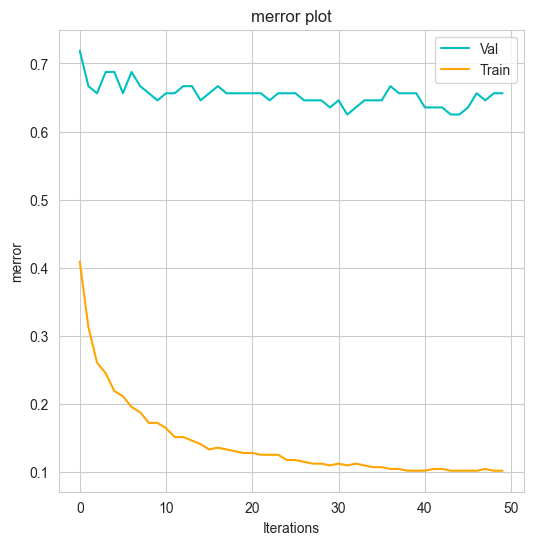

In [365]:
training_data = {'X_train':X_train,'Y_train':y_train,
                'X_val': X_val,'Y_val':y_val,
                'X_test': X_test,'Y_test':list(y_test)} # for some reason I need a list here
fitXgb(xgb1, training_data, 50)

In [367]:
from sklearn.metrics import confusion_matrix

preds = xgb1.predict(X_test)
labels = list(y_test)
print(confusion_matrix(labels, preds))
print(accuracy_score(labels, preds))
print(recall_score(labels, preds, average='weighted'))
print(precision_score(labels, preds, average='weighted'))

[[17  2  0  0  4  1]
 [ 1  4  3  4  9  1]
 [ 1  1  6  2  4  4]
 [ 0  6  6  4  2  3]
 [ 1  2  3  2  5  0]
 [ 2  2  6  5  3  4]]
0.3333333333333333
0.3333333333333333
0.3528311648409687


In [297]:
song_lyric_df

artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
1              Beck                         Loser             Hiphop   
2      Public Enemy               Fight The Power             Hiphop   
3    Kendrick Lamar                       Alright             Hiphop   
4             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
595    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
596       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
597    Neil Diamond                Sweet Caroline  Singer/Songwriter   
598       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
599      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
1           http://azlyrics.com/lyrics/beck/loser.html   
2    http://azlyrics.com/lyrics/publicenemy/fightth...   
3    http://azlyrics.com/lyrics/kendricklamar/alrig...   
4      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
595  http://azlyrics.com/lyrics/gramparsons/returno...   
596  http://azlyrics.com/lyrics/philochs/iaintmarch...   
597  http://azlyrics.com/lyrics/neildiamond/sweetca...   
598  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
599  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  \
0    \n\r\nI fly like paper, get high like planes\n...   
1    \n\r\nIn the time of chimpanzees\nI was a monk...   
2    \n\r\n"Yet our best trained, best educated, be...   
3    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...   
4    \n\r\nIf you're having girl problems, I feel b...   
..                                                 ...   
595  \n\r\nWon't you scratch my itch sweet Annie Ri...   
596  \n\r\nOh, I marched to the battle of New Orlea...   
597  \n\r\nWhere it began\nI can't begin to knowin'...   
598  \n\r\n'Twas in another lifetime one of toil an...   
599  \n\r\nThe first time I tasted somebody else's ...   

                                         CleanedLyrics number_of_tokens  \
0    fli like paper get high like plane catch borde...              211   
1    time chimpanze monkey butan vein cut junki pla...              191   
2    yet best train best educ best equip best prepa...              214   
3    kendrick lamar all life fight nigga all life h...              368   
4    girl problem feel bad son got problem bitch on...              356   
..                                                 ...              ...   
595  scratch itch sweet anni rich welcom back town ...              153   
596  oh march battl new orlean end earli british wa...              136   
597  began begin knowin know growin strong spring s...               79   
598  twa anoth lifetim one toil blood black virtu r...              214   
599  first time tast somebodi els spit cough fit mi...              158   

    unique_words                                         text_clean  \
0             80  [fly, like, paper, get, high, like, planes, if...   
1            132  [in, the, time, of, chimpanzees, was, monkey, ...   
2            135  [yet, our, best, trained, best, educated, best...   
3            197  [kendrick, lamar, alls, my, life, has, to, fig...   
4            199  [if, you, re, having, girl, problems, feel, ba...   
..           ...                                                ...   
595           95  [won, you, scratch, my, itch, sweet, annie, ri...   
596           87  [oh, marched, to, the, battle, of, new, orlean...   
597           36  [where, it, began, can, begin, to, knowin, but...   
598          151  [twas, in, another, lifetime, one, of, toil, a...   
599           94  [the, first, time, tasted, somebody, else, spi...   



In [291]:
list(song_lyric_df['genre'])

['Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',
 'Hiphop',

## LSTM

In [374]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 110)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state= 8) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (384, 7152)
X_test shape: (120, 7152)
y_train shape: (384, 6)
y_test shape: (120, 6)
X_val shape: (384, 6)
y val shape: (120, 6)


In [408]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential



# The input text, example could be list of sentences
texts = cleaned_corpus

# The labels corresponding to the input text
labels = list(song_lyric_df['genre_label'])

# Hyperparameters 
max_words = 100000 # max number of words to use in the vocabulary
max_len = 500 # max length of each text (in terms of number of words)
embedding_dim = 100 # dimension of word embeddings
lstm_units = 64 # number of units in the LSTM layer
num_classes = len(set(labels)) # number of classes

# Tokenize the texts and create a vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences so they all have the same length
x = pad_sequences(sequences, maxlen=max_len)

# Create one-hot encoded labels
y = keras.utils.to_categorical(labels, num_classes)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Build the model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(lstm_units))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

#model.fit(x, y, batch_size=32, epochs=10)


Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 781ms/step - accuracy: 0.1602 - loss: 0.6911 - val_accuracy: 0.1583 - val_loss: 0.6820
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 0.1731 - loss: 0.6762 - val_accuracy: 0.1667 - val_loss: 0.6627
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.1748 - loss: 0.6492 - val_accuracy: 0.1667 - val_loss: 0.6193
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - accuracy: 0.1523 - loss: 0.5891 - val_accuracy: 0.1667 - val_loss: 0.5127
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 0.1521 - loss: 0.4960 - val_accuracy: 0.1667 - val_loss: 0.4801
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.1695 - loss: 0.4727 - val_accuracy: 0.1667 - val_loss: 0.4625
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.1693 - loss: 0.4542 - val_accuracy: 0.1417 - val_loss: 0.4533
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 0.1845 - loss: 0.4459 - val_accuracy: 0.1417 - val_loss:

In [409]:
# evaluate the model
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 85.208333


In [410]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test
                                , verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 33.333334


In [ ]:

from sklearn.model_selection import GridSearchCV

param_test1 = {
 #'max_words':range(1,100000,25000),
 'max_len':range(1,1000,250),
 'embedding_dim':range(1,500,100),
 'lstmn_units':range(1,256,32)
}

gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(x_train, y_train)

In [338]:
def make_lstm_prediction(url):
    new_lyric = get_lyrics(url)
    new_text = text_preprocessing(new_lyric)  # You need to define preprocess_text function
    # Tokenize the new text
    new_sequence = tokenizer.texts_to_sequences([new_text])
    
    # Pad the sequence
    new_padded_sequence = pad_sequences(new_sequence, maxlen=max_len)
    
    # Make predictions
    predictions = model.predict(new_padded_sequence)
    
    predicted_genre_index = np.argmax(predictions)
    #print(predicted_genre_index)
    genre_labels = ['Hip-hop', 'Rock', 'Country', 'Pop', 'RnB', 'Singer/Songwriter']
    predicted_genre = genre_labels[predicted_genre_index]
    return predicted_genre


In [411]:
make_lstm_prediction('https://www.azlyrics.com/lyrics/kanyewest/offthegrid.html')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


'Hip-hop'

In [345]:
make_lstm_prediction('https://www.azlyrics.com/lyrics/acdc/thunderstruck.html')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


'Rock'

In [350]:
make_lstm_prediction('https://www.azlyrics.com/lyrics/taylorswift/willow.html')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


'Hip-hop'

## SVM

In [412]:
from sklearn import model_selection


Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(song_lyric_df['text_clean'],song_lyric_df['genre_label'],test_size=0.3)

artist                         title              genre  \
0            M.I.A.                  Paper Planes             Hiphop   
1              Beck                         Loser             Hiphop   
2      Public Enemy               Fight The Power             Hiphop   
3    Kendrick Lamar                       Alright             Hiphop   
4             JAY-Z                   99 Problems             Hiphop   
..              ...                           ...                ...   
595    Gram Parsons  Return of the Grievous Angel  Singer/Songwriter   
596       Phil Ochs      I Ain't Marching Anymore  Singer/Songwriter   
597    Neil Diamond                Sweet Caroline  Singer/Songwriter   
598       Bob Dylan        Shelter from the Storm  Singer/Songwriter   
599      Lucy Dacus                   Night Shift  Singer/Songwriter   

                                                   URL  \
0      http://azlyrics.com/lyrics/mia/paperplanes.html   
1           http://azlyrics.com/lyrics/beck/loser.html   
2    http://azlyrics.com/lyrics/publicenemy/fightth...   
3    http://azlyrics.com/lyrics/kendricklamar/alrig...   
4      http://azlyrics.com/lyrics/jayz/99problems.html   
..                                                 ...   
595  http://azlyrics.com/lyrics/gramparsons/returno...   
596  http://azlyrics.com/lyrics/philochs/iaintmarch...   
597  http://azlyrics.com/lyrics/neildiamond/sweetca...   
598  http://azlyrics.com/lyrics/bobdylan/shelterfro...   
599  http://azlyrics.com/lyrics/lucydacus/nightshif...   

                                                lyrics  \
0    \n\r\nI fly like paper, get high like planes\n...   
1    \n\r\nIn the time of chimpanzees\nI was a monk...   
2    \n\r\n"Yet our best trained, best educated, be...   
3    \n\n[Kendrick Lamar:]\nAlls my life, I has to ...   
4    \n\r\nIf you're having girl problems, I feel b...   
..                                                 ...   
595  \n\r\nWon't you scratch my itch sweet Annie Ri...   
596  \n\r\nOh, I marched to the battle of New Orlea...   
597  \n\r\nWhere it began\nI can't begin to knowin'...   
598  \n\r\n'Twas in another lifetime one of toil an...   
599  \n\r\nThe first time I tasted somebody else's ...   

                                         CleanedLyrics number_of_tokens  \
0    fli like paper get high like plane catch borde...              211   
1    time chimpanze monkey butan vein cut junki pla...              191   
2    yet best train best educ best equip best prepa...              214   
3    kendrick lamar all life fight nigga all life h...              368   
4    girl problem feel bad son got problem bitch on...              356   
..                                                 ...              ...   
595  scratch itch sweet anni rich welcom back town ...              153   
596  oh march battl new orlean end earli british wa...              136   
597  began begin knowin know growin strong spring s...               79   
598  twa anoth lifetim one toil blood black virtu r...              214   
599  first time tast somebodi els spit cough fit mi...              158   

    unique_words                                         text_clean  \
0             80  [fly, like, paper, get, high, like, planes, if...   
1            132  [in, the, time, of, chimpanzees, was, monkey, ...   
2            135  [yet, our, best, trained, best, educated, best...   
3            197  [kendrick, lamar, alls, my, life, has, to, fig...   
4            199  [if, you, re, having, girl, problems, feel, ba...   
..           ...                                                ...   
595           95  [won, you, scratch, my, itch, sweet, annie, ri...   
596           87  [oh, marched, to, the, battle, of, new, orlean...   
597           36  [where, it, began, can, begin, to, knowin, but...   
598          151  [twas, in, another, lifetime, one, of, toil, a...   
599           94  [the, first, time, tasted, somebody, else, spi...   



In [417]:
from sklearn import model_selection, naive_bayes, svm

In [420]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 110)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state= 8) # 0.25 x 0.8 = 0.2

In [425]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [431]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [432]:
from sklearn.svm import SVC

classifier = SVC(C = 1.0, kernel = 'linear', degree = 3, random_state = 110)
classifier.fit(X_train_scaled, y_train)


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.